# Sylvie Fortier

# Data Integration

In [1306]:
import scipy
print('Scipy version:', scipy.__version__)
import xlrd
print('\nxlrd version:', xlrd.__version__)

Scipy version: 1.7.2

xlrd version: 2.0.1


In [1]:
# For consistency in graphs throughout the notebook
import numpy as np
import pandas as pd
from pprint import pprint

# For consistency in figures throughout the notebook
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Make this notebook's output stable across runs
random_state=42

# To play sound when a cell is done
from playsound import playsound

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

playsound is relying on another python subprocess. Please use `pip install pygobject` if you want playsound to run more efficiently.


After installing the necessary libraries, proceed to download the data. Since reading the excel file won't create headers by default, we added two more operations to substitute the columns.

In [2]:
# Load the data
df = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls", header=1)

# Data Inspection and Cleaning

In [3]:
# Remove ID column
df.drop(['ID'], axis=1, inplace=True)

In the following, you can take a look into the dataset.

In [4]:
df.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0      20000    2          2         1   24      2      2     -1     -1   
1     120000    2          2         2   26     -1      2      0      0   
2      90000    2          2         2   34      0      0      0      0   
3      50000    2          2         1   37      0      0      0      0   
4      50000    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...          0          0          0         0       689         0   
1      0  ...       3272       3455       3261         0      1000      1000   
2      0  ...      14331      14948      15549      1518      1500      1000   
3      0  ...      28314      28959      29547      2000      2019      1200   
4      0  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 24 columns]

In [15]:
# Check number of observations and columns
df.shape

(30000, 24)

**Notes:**<br>
    30k observations
    1x DV/Target
    23x features

In [16]:
# Check for data types
df.dtypes

LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [5]:
# Rename columns for ease of use
df.columns = ['Limit', 'Sex', 'Education', 'Marriage', 'Age', \
              'Pay_1', 'Pay_2', 'Pay_3', 'Pay_4', 'Pay_5', 'Pay_6', \
              'Bill_1', 'Bill_2', 'Bill_3', 'Bill_4', 'Bill_5', 'Bill_6', \
              'Pay_amt1', 'Pay_amt2', 'Pay_amt3','Pay_amt4', 'Pay_amt5', 'Pay_amt6', \
              'Target']

In [6]:
# Rearrange columns 
df = df[['Target', 'Sex', 'Education', 'Marriage', \
         'Pay_1', 'Pay_2', 'Pay_3', 'Pay_4', 'Pay_5', 'Pay_6', \
         'Age', 'Limit', \
         'Bill_1', 'Bill_2', 'Bill_3', 'Bill_4', 'Bill_5', 'Bill_6', \
         'Pay_amt1', 'Pay_amt2', 'Pay_amt3','Pay_amt4', 'Pay_amt5', 'Pay_amt6']]

In [7]:
# Check for duplicates
df.duplicated().any()

True

In [8]:
# Remove duplicates
df.drop_duplicates(inplace=True)
df.shape

(29965, 24)

In [9]:
# Check for missing values
df.isnull().values.any()

False

In [10]:
# Check for negatives
df.agg(lambda x: sum(x < 0)).sum()

62804

Note: with this dataset it makes senses to have lots of negatives values. 

In [11]:
# Find unique values for Target
df['Target'].unique()

array([1, 0])

Note:<br>We are dealing with a Binary Classification problem.

Target
0         23335
1          6630
dtype: int64

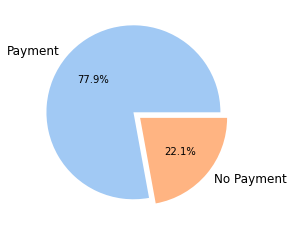

In [12]:
# Define custom function to check if the dataset is balanced or not
def check_dataset_balance(series):
    
    # find unique values
    unique = series.value_counts()
    display(unique)
    
    # plot a pie chart to see if data are balanced
    legend=['Payment','No Payment']
    plt.pie(x=unique, explode=[0.05]*len(unique), labels=legend, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
    plt.show()
        
# Call the function with series=df.Target
check_dataset_balance(df[['Target']])

Note:<br>
We are dealing with an imbalanced dataset

# Data Exploration and Transformation

In [25]:
# Conduct univariate descriptive analysis on the entire dataset
df.describe().loc[['mean', 'std', 'min', 'max']]

Target       Sex  Education  Marriage     Pay_1     Pay_2     Pay_3  \
mean  0.221258  1.603738   1.853629  1.551877 -0.016753 -0.131854 -0.164392   
std   0.415101  0.489128   0.790411  0.521997  1.123492  1.196322  1.195878   
min   0.000000  1.000000   0.000000  0.000000 -2.000000 -2.000000 -2.000000   
max   1.000000  2.000000   6.000000  3.000000  8.000000  8.000000  8.000000   

         Pay_4     Pay_5     Pay_6  ...        Bill_3         Bill_4  \
mean -0.218922 -0.264509 -0.289438  ...  4.706792e+04   43313.329885   
std   1.168175  1.132220  1.149090  ...  6.937135e+04   64353.514373   
min  -2.000000 -2.000000 -2.000000  ... -1.572640e+05 -170000.000000   
max   8.000000  8.000000  8.000000  ...  1.664089e+06  891586.000000   

             Bill_5         Bill_6       Pay_amt1      Pay_amt2  \
mean   40358.334390   38917.012281    5670.099316  5.927983e+03   
std    60817.130623   59574.147742   16571.849467  2.305346e+04   
min   -81334.000000 -339603.000000       0.000000  0.000000e+00   
max   927171.000000  961664.000000  873552.000000  1.684259e+06   

           Pay_amt3       Pay_amt4       Pay_amt5       Pay_amt6  
mean    5231.688837    4831.617454    4804.897047    5221.498014  
std    17616.361124   15674.464538   15286.372298   17786.976864  
min        0.000000       0.000000       0.000000       0.000000  
max   896040.000000  621000.000000  426529.000000  528666.000000  

[4 rows x 24 columns]

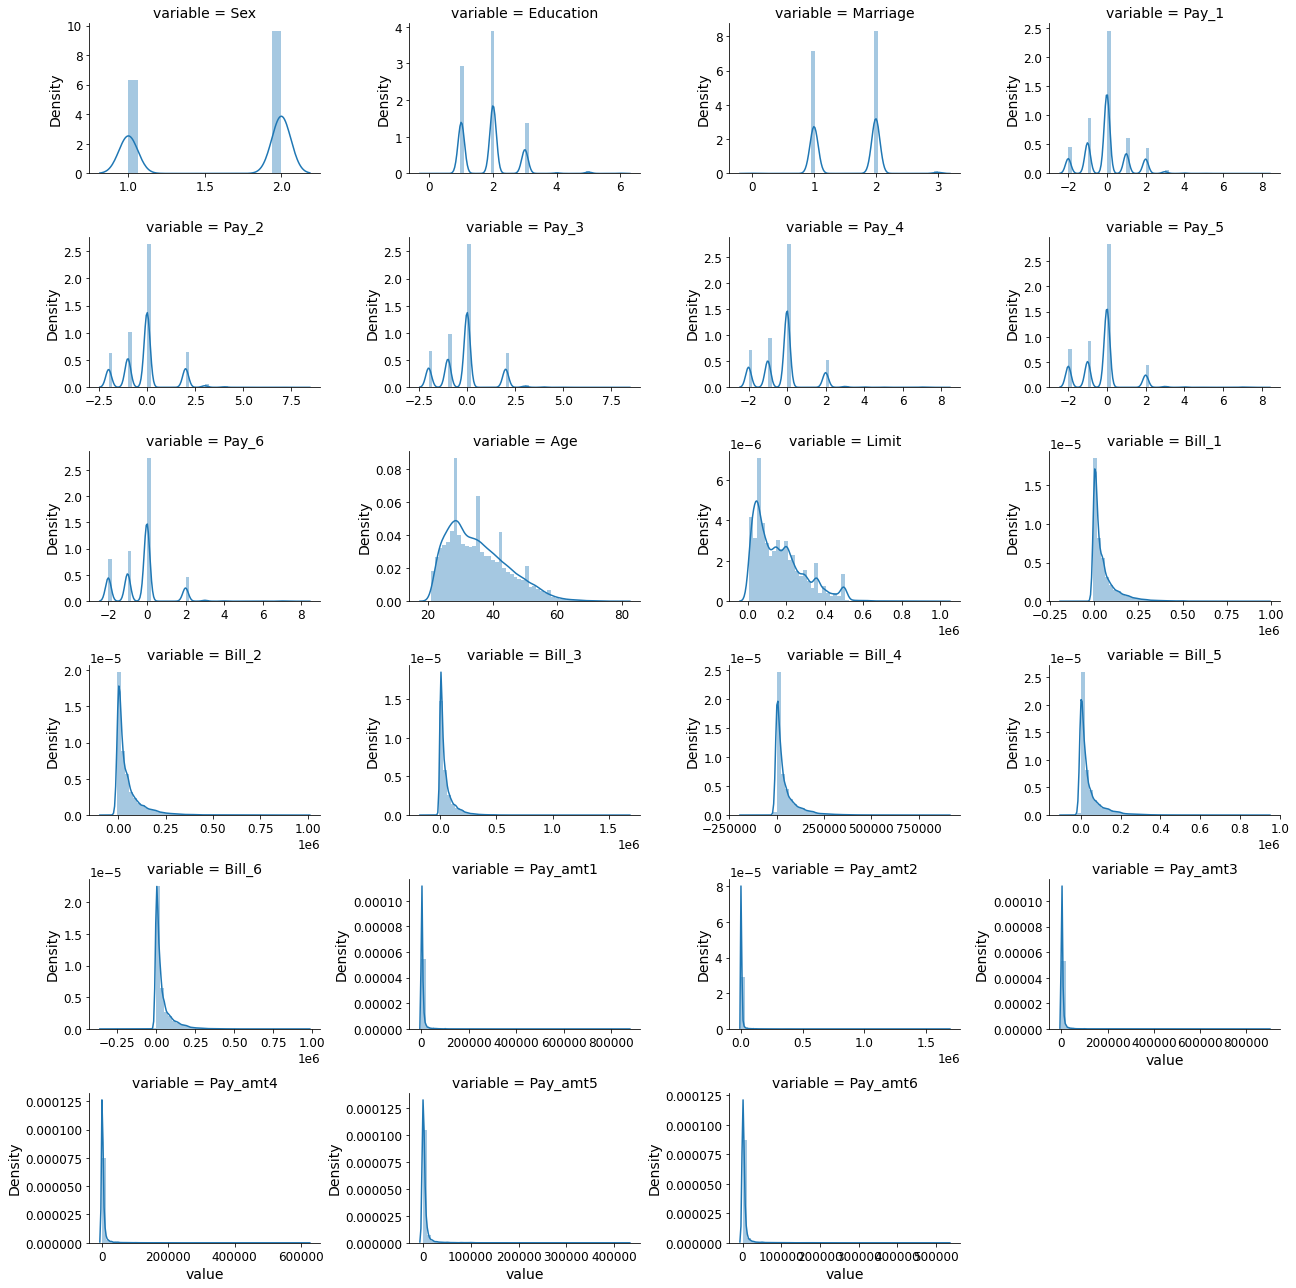

In [26]:
# Look at the data distribution for each feature seperately

# for ease of viewing, list alphabetically
# df = df.reindex(sorted(df.columns), axis=1)

# unpivot DF from wide to long
features = df.reindex(df.columns[1:], axis=1).melt() # all except target

# # plot the distribution of all features
g = sns.FacetGrid(features, col ='variable', col_wrap=4, sharex=False, sharey=False, aspect=1.5)
g.map(sns.distplot, 'value');

In [13]:
# Find unique values for categorial features
cat_features = ['Sex', 'Education', 'Marriage', 'Pay_1', 'Pay_2', 'Pay_3', 'Pay_4', 'Pay_5', 'Pay_6']

for i in df[cat_features].columns:
    print(i, sorted(df[i].unique()))

Sex [1, 2]
Education [0, 1, 2, 3, 4, 5, 6]
Marriage [0, 1, 2, 3]
Pay_1 [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
Pay_2 [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
Pay_3 [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
Pay_4 [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
Pay_5 [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]
Pay_6 [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]


Note:<br>
- Dichotomous variables: Sex
- Nominal variables: Education, Marriage
- Ordinal variables: Pay_1to6

For simplicity for this assignment, let's combine them all into a single list of categorical features and the remaining into a single list of numerical features.

In [14]:
# List of all features
features = [col for col in df.columns if col != 'Target']

# List of categorical features
cat_features = ['Sex', 'Education', 'Marriage', 'Pay_1', 'Pay_2', 'Pay_3', 'Pay_4', 'Pay_5', 'Pay_6']

# List of numerical features
num_features = [col for col in features if col not in cat_features]

print(f"""
All features >>> {features}

Cat features >>> {cat_features}

Num features >>> {num_features}
""")


All features >>> ['Sex', 'Education', 'Marriage', 'Pay_1', 'Pay_2', 'Pay_3', 'Pay_4', 'Pay_5', 'Pay_6', 'Age', 'Limit', 'Bill_1', 'Bill_2', 'Bill_3', 'Bill_4', 'Bill_5', 'Bill_6', 'Pay_amt1', 'Pay_amt2', 'Pay_amt3', 'Pay_amt4', 'Pay_amt5', 'Pay_amt6']

Cat features >>> ['Sex', 'Education', 'Marriage', 'Pay_1', 'Pay_2', 'Pay_3', 'Pay_4', 'Pay_5', 'Pay_6']

Num features >>> ['Age', 'Limit', 'Bill_1', 'Bill_2', 'Bill_3', 'Bill_4', 'Bill_5', 'Bill_6', 'Pay_amt1', 'Pay_amt2', 'Pay_amt3', 'Pay_amt4', 'Pay_amt5', 'Pay_amt6']



## Invalid data

(i) Education

Possible values for Education are 1 = graduate school; 2 = university; 3 = high school; or 4 = others
Therefore, all values outside the range (1-4) are considered invalid and should be removed.

In [15]:
# How many observations with Education < 1 and > 4
print('Number of observations with Education less than 1 >>>', df[df.Education < 1].shape[0]) # shape[0] = rows 
print('Number of observations with Education greater than 4 >>>', df[df.Education > 4].shape[0])

Number of observations with Education less than 1 >>> 14
Number of observations with Education greater than 4 >>> 331


In [16]:
# Drop invalid observations for Education
df.drop(labels=df[df.Education < 1].index.tolist(), axis=0, inplace=True)
df.drop(labels=df[df.Education > 4].index.tolist(), axis=0, inplace=True)
df.shape

(29620, 24)

(ii) Marriage

Possible values for Marriage are 1 = married; 2 = single; or 3 = others
Therefore, all values outside the range (1-3) are considered invalid and should be removed.

In [17]:
# How many observations with Marriage < 1 and > 3
print('Number of observations with Marriage less than 1 >>>', df[df.Marriage < 1].shape[0]) # shape[0] = rows 
print('Number of observations with Marriage greater than 3 >>>', df[df.Marriage > 3].shape[0])

Number of observations with Marriage less than 1 >>> 54
Number of observations with Marriage greater than 3 >>> 0


In [18]:
# Drop invalid observations for Marriage
df.drop(labels=df[df.Marriage < 1].index.tolist(), axis=0, inplace=True)
df.shape

(29566, 24)

## Data transformation

In [19]:
# Test for Normality: Shapiro-Wilk
import scipy.stats as stats

for col in df.columns[1:]:
  
  # Perform Shapiro-Wilk test
    w,p = stats.shapiro(df[[col]])

  # Determine if p-value is < 0.05
    if p < 0.05:
        print('The sample does "NOT" come from a normal distribution for {}'.format(col))
    else:
        print('The sample comes from a normal distribution for {}'.format(col))

The sample does "NOT" come from a normal distribution for Sex
The sample does "NOT" come from a normal distribution for Education
The sample does "NOT" come from a normal distribution for Marriage
The sample does "NOT" come from a normal distribution for Pay_1
The sample does "NOT" come from a normal distribution for Pay_2
The sample does "NOT" come from a normal distribution for Pay_3
The sample does "NOT" come from a normal distribution for Pay_4
The sample does "NOT" come from a normal distribution for Pay_5
The sample does "NOT" come from a normal distribution for Pay_6
The sample does "NOT" come from a normal distribution for Age
The sample does "NOT" come from a normal distribution for Limit
The sample does "NOT" come from a normal distribution for Bill_1
The sample does "NOT" come from a normal distribution for Bill_2
The sample does "NOT" come from a normal distribution for Bill_3
The sample does "NOT" come from a normal distribution for Bill_4
The sample does "NOT" come from a

**Note**<br>
Since tree-based algorithms and ensemble do not assume normal distribution, there is no requirement to transform non-normal data.

## Numerical Features

### (i) Correlation analysis - Point-biserial

For a binary categorical variable (y) and a continuous variable we can calculate the point-biserial correlation coefficient if the categorical variable has a 0/1-coding for the categories. 

https://help.xlstat.com/s/article/which-statistical-test-should-you-use?language=en_US

In [20]:
# Calculate point-biserial correlation between y and num_features
import scipy.stats as stats

y = df['Target']

for var in df[num_features]:
    x = df[num_features][var]
    corr = stats.pointbiserialr(x, y)
    print(var, round(corr[0],3))

Age 0.014
Limit -0.155
Bill_1 -0.019
Bill_2 -0.014
Bill_3 -0.014
Bill_4 -0.01
Bill_5 -0.006
Bill_6 -0.005
Pay_amt1 -0.074
Pay_amt2 -0.058
Pay_amt3 -0.056
Pay_amt4 -0.057
Pay_amt5 -0.056
Pay_amt6 -0.054


Note:<br>
There is no strong correlation between the Target and any numerical variables.<br>
The strongest correlations are with Limit and Pay_amt but still really weak.

### (ii) Pairplot

Let's plot pairplots to see the correlations between the Target and each pair of num_features

Note: we'll plot only 1k observations to ease on the processing time.

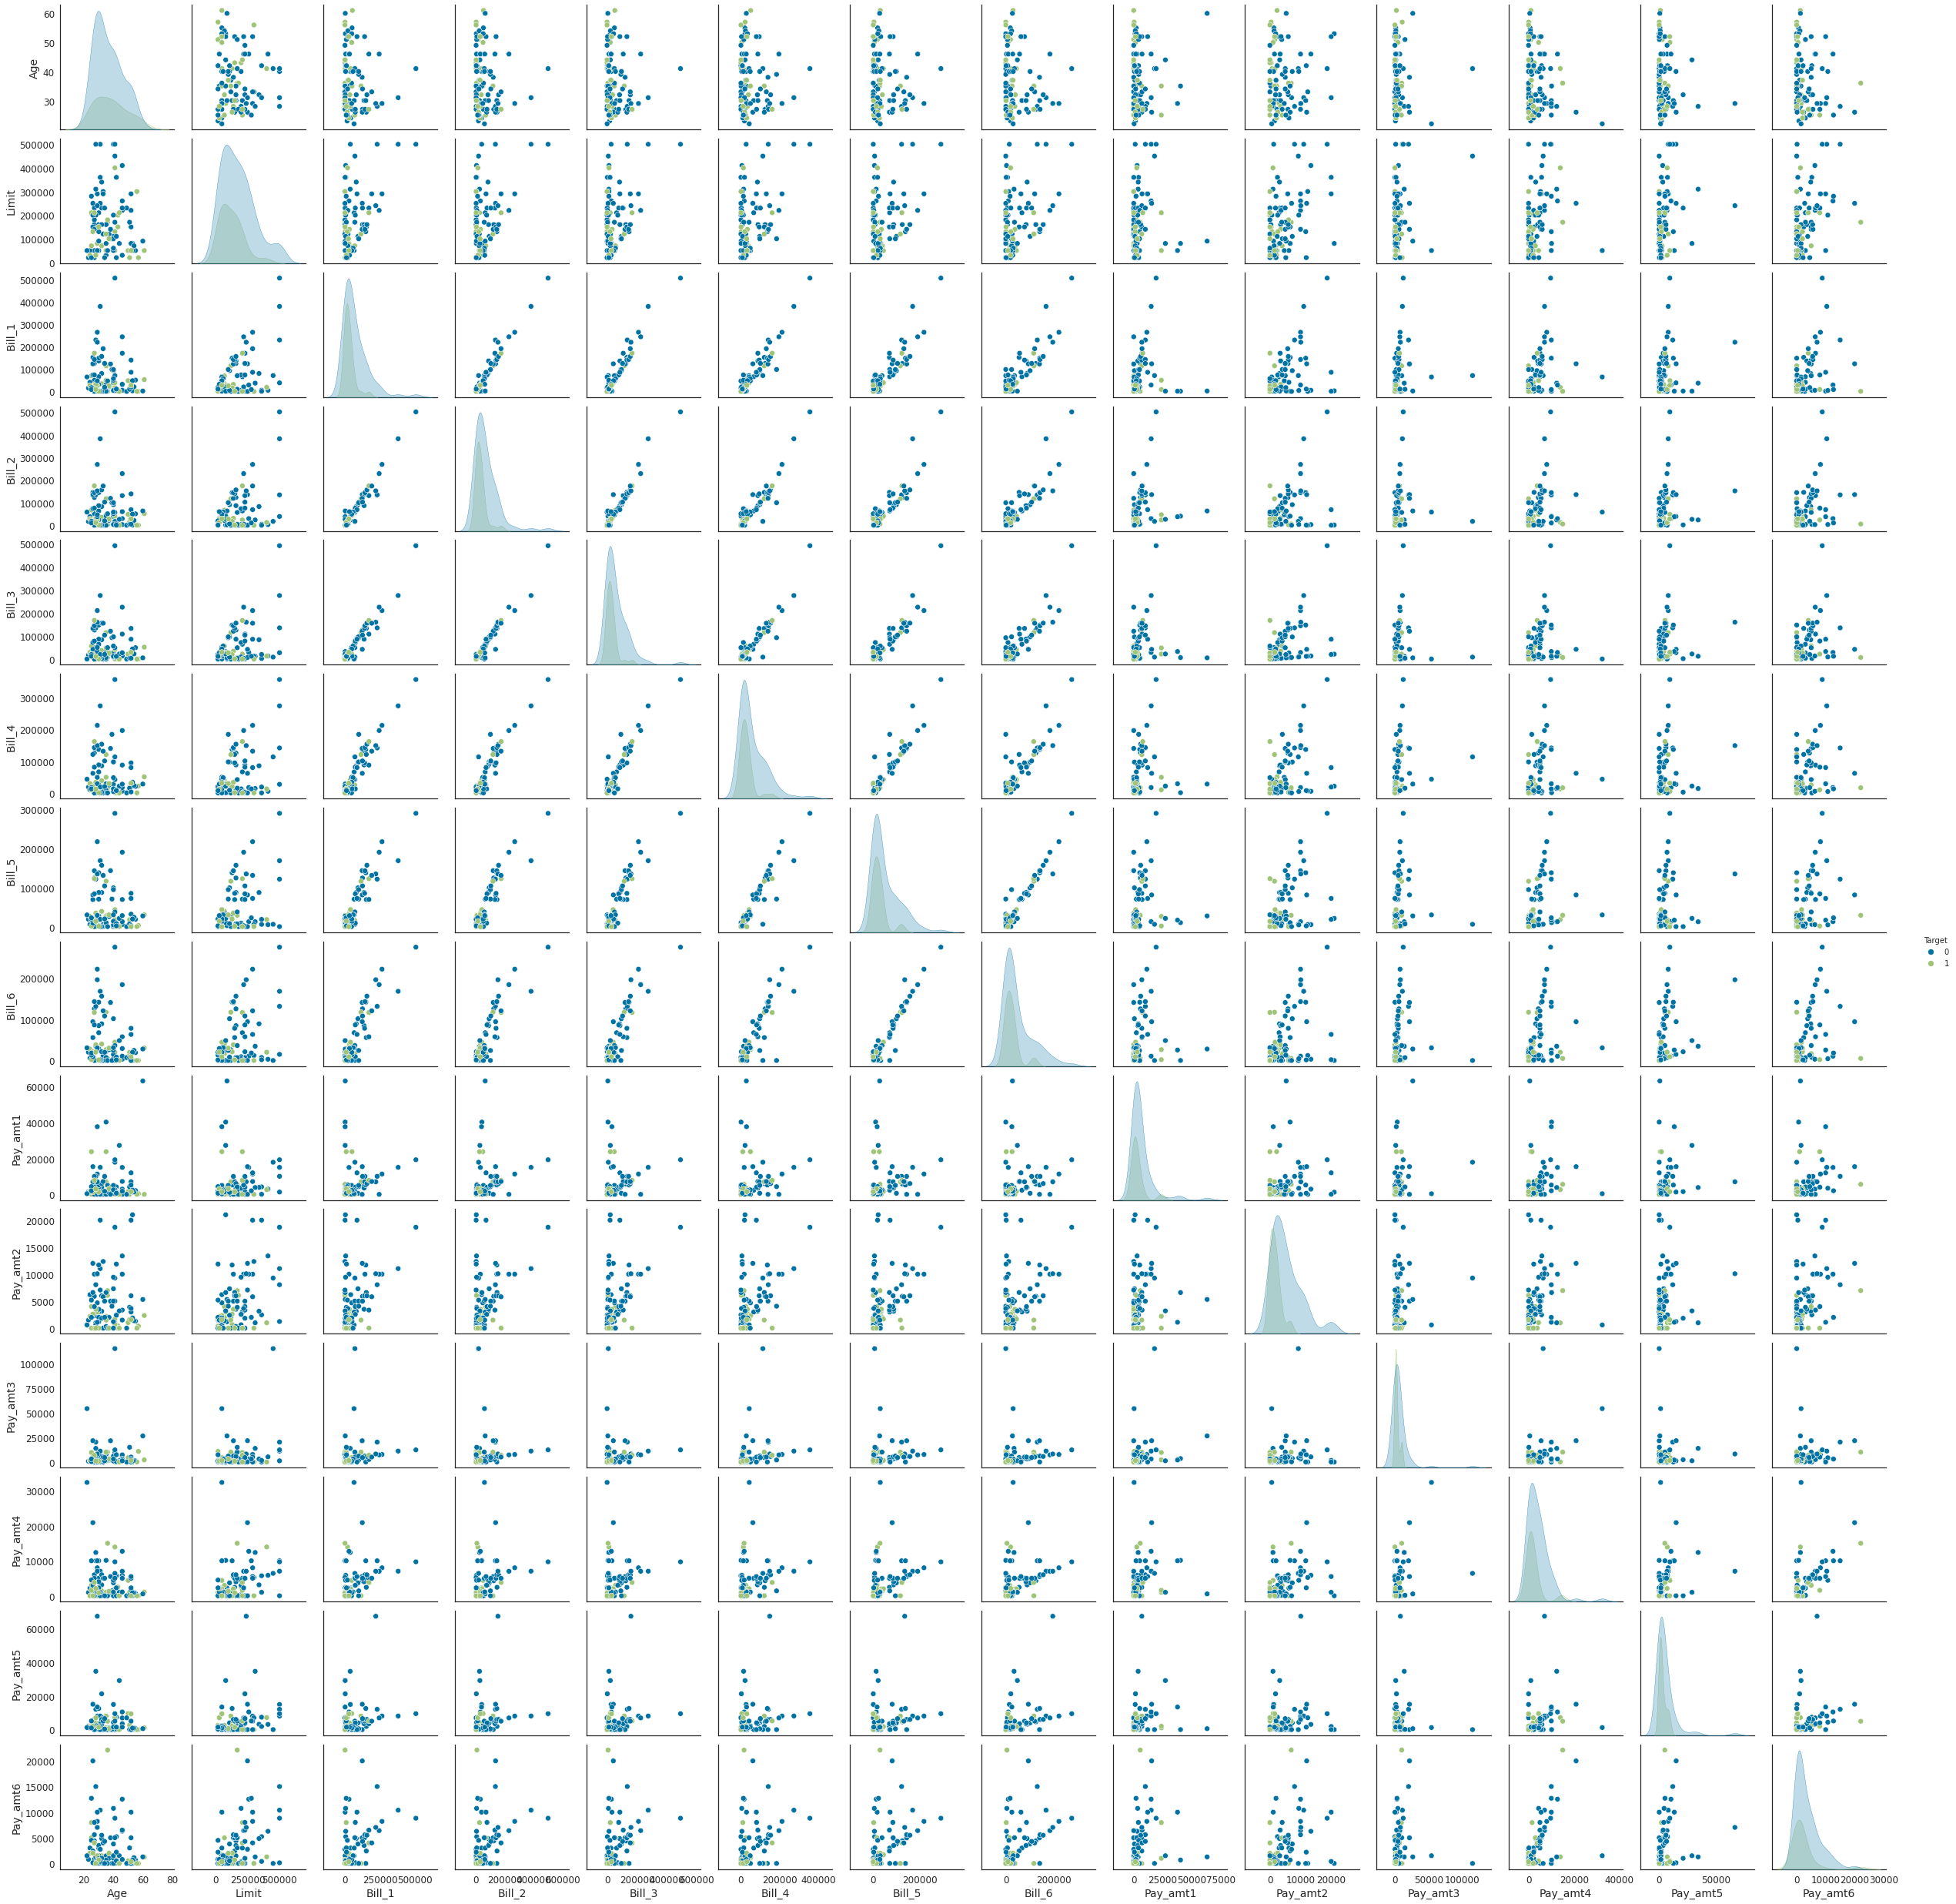

In [1369]:
# Plot all num_features with the Target as hue

# Only plot a sample of 1k observations to make it faster
sns.pairplot(df.sample(100), vars=num_features, hue='Target');


### (iii) Multicollinearity

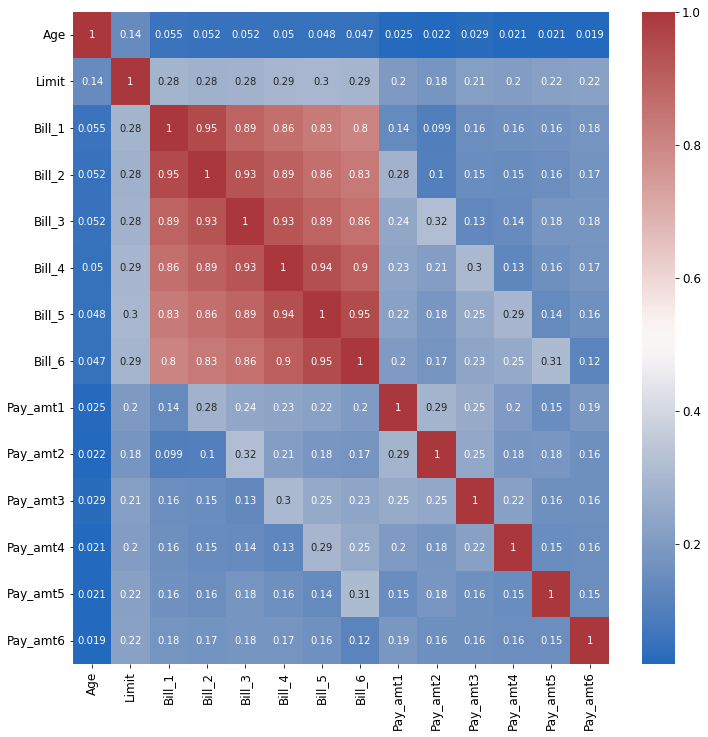

In [35]:
# Show correlation coefficients (correlation matrix) to check for multicollinearity among num_features
plt.figure(figsize=(12,12))
sns.heatmap(df[num_features].corr(method='pearson'), annot=True, cmap=sns.cm.vlag);

Note:<br>
Strong correlations among numerical features are displayed in red. If we keep all these features, there is a high chance of multicollinearity.<br>
According to the graph above, all Bill_1-6 are strongly correlated and therefore only one of these features should be used in the model.

### (iv) VIF 

The Variance Inflation Factor (VIF) measures for how much multicollinearity exists in a regression model. Essentially, it measures for how much regression coefficients are affected by other independent variables in the model. Higher values of Variance Inflation Factor (VIF) are associated with multicollinearity.
In other words, it quantifies the severity of multicollinearity among features. It provides an index that measures how much the variance of an estimated regression coefficient is increased because of collinearity. <br>https://en.wikipedia.org/wiki/Variance_inflation_factor<br>
The generally accepted cutoff for VIF is 10, with higher values denoting levels of multicollinearity that could negatively impact the regression model. However, some authors suggest a more conservative level of 2.5 or above. <br>https://en.wikipedia.org/wiki/Variance_inflation_factor

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Get features for which to compute VIF
df2 = df[num_features]

# Add a new column 'Intercept' filled with 1
df2['Intercept'] = 1

# Create empty VIF dataframe
df_vif = pd.DataFrame()

# Add names of features
df_vif['num_features'] = df2.columns

# Add a new column and compute VIF factor
df_vif['VIF factor'] = [variance_inflation_factor(df2.values, i) for i in range(df2.shape[1])] # for all columns including intercept

# View results
df_vif

num_features  VIF factor
0           Age    1.021997
1         Limit    1.231328
2        Bill_1   13.847035
3        Bill_2   25.588424
4        Bill_3   21.853977
5        Bill_4   20.498299
6        Bill_5   25.455385
7        Bill_6   15.346620
8      Pay_amt1    1.695098
9      Pay_amt2    2.237841
10     Pay_amt3    1.741471
11     Pay_amt4    1.641342
12     Pay_amt5    1.697921
13     Pay_amt6    1.165514
14    Intercept   16.462048

Note:<br>
Again, Bill_1-6 show potential high multicollinearity because the VIF factors are more than the cutoff of 10.<br>
Consequently, I feel confident that we should only keep Bill_1 (with the lowest VIF value) and remove Bill_2-6 from the list of features.<br>
All other features are below the conservative cutoff value of 2.5.

## Categorical variables

### (i) Correlation analysis - Chi-Square

In [22]:
from scipy import stats
from scipy.stats import chi2_contingency

for var in cat_features: 
    
    obs = pd.crosstab(index=df.Target, columns=df[var])
    chi2, p, dof, expctd = chi2_contingency(obs)
    print('p-value for {}: {}'.format(var, p))

p-value for Sex: 1.0926416328513604e-11
p-value for Education: 1.43549682347754e-25
p-value for Marriage: 1.5703057278917513e-07
p-value for Pay_1: 0.0
p-value for Pay_2: 0.0
p-value for Pay_3: 0.0
p-value for Pay_4: 0.0
p-value for Pay_5: 0.0
p-value for Pay_6: 0.0


### (ii) Barchart

For categorical variables we will use barcharts.

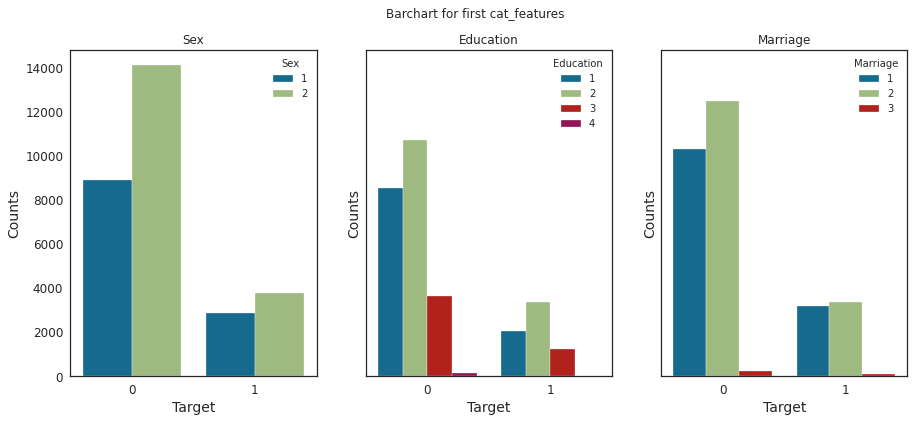

In [1373]:
# Plot first cat_features
fig, axes = plt.subplots(1,3, figsize=(15,6), sharey=True)

for ax,var in zip(axes, cat_features[:3]): 
    
    sns.countplot(df.Target, hue=df[var], ax=ax)
    ax.set_title(var)
    ax.set_ylabel('Counts') 
    
plt.suptitle('Barchart for first cat_features');

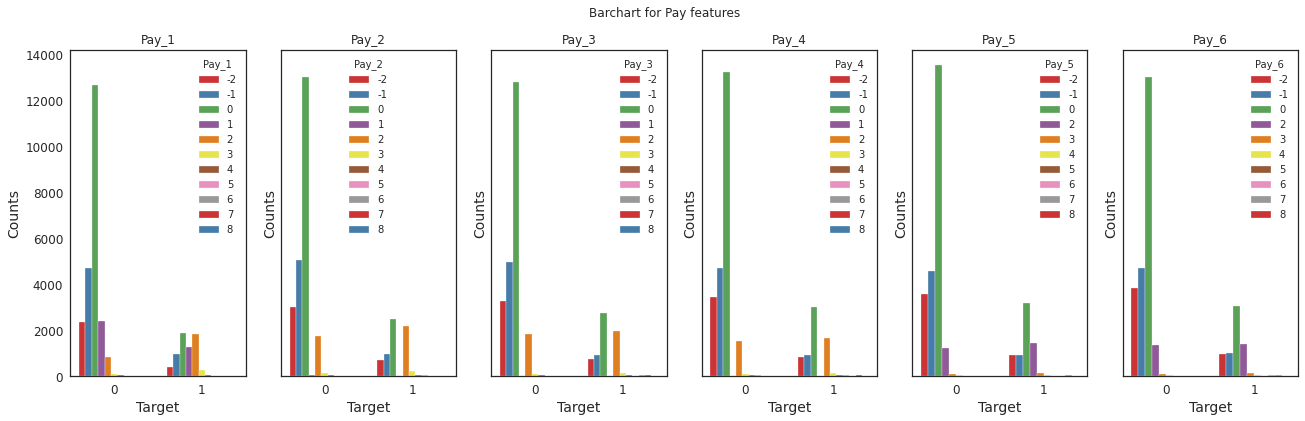

In [1374]:
# Plot Pay features
sns.set_style("ticks")
fig, axes = plt.subplots(1,6, figsize=(22,6), sharey=True)
  
for ax,var in zip(axes, cat_features[3:]): 
    
    sns.countplot(df.Target, hue=df[var], ax=ax, palette='Set1')
    ax.set_title(var)
    ax.set_ylabel('Counts')
    
plt.suptitle('Barchart for Pay features');

### (iii) Cramer's V

Cramer’s V is a statistic measuring the strength of association or dependency between two (nominal) categorical variables.<br>
Cramer’s V correlation coefficient from 0 (corresponding to no association between the variables) to 1 (complete association).<br>
Cramer’s V is an effect size measurement for the chi-square test of independence. It measures how strongly two categorical fields are associated.

    ES ≤ 0.2 >>> The result is weak. Although the result is statistically significant, the fields are only weakly associated.
    0.2 < ES ≤ 0.6 >>> The result is moderate. The fields are moderately associated.
    ES > 0.6 >>> The result is strong. The fields are strongly associated.

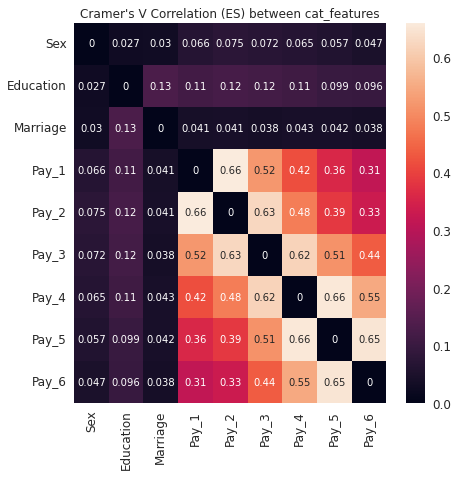

In [1375]:
from scipy.stats import chi2_contingency
import scipy.stats as stats
import itertools

# Define custom function to calculate Cramer's V for categorical-categorical association
def cramers_v(x,y):
    
    confusion_matrix = pd.crosstab(x,y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Define categorical features
cols = cat_features

corrM = np.zeros((len(cols),len(cols)))

for col1, col2 in itertools.combinations(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    corrM[idx1, idx2] = cramers_v(df[col1], df[col2])
    corrM[idx2, idx1] = corrM[idx1, idx2]

corr = pd.DataFrame(corrM, index=cols, columns=cols)

# Plot heatmap to show the correlations
fig, ax = plt.subplots(figsize=(7,7))
ax = sns.heatmap(corr, annot=True, ax=ax); ax.set_title("Cramer's V Correlation (ES) between cat_features");

Note:<br>
We can see strong effect size (>0.6) among Pay variables. This may cause high chance of multicollinearity in the model and should be removed.<br>
Therefore, we will keep Pay_1 and remove the other ones.

## Remove features
Removal of features associated with high risk of multicollinearity

In [23]:
# Remove Bill_2-6 and Pay_2-6 from the list of features

# List of all features
features

# List of columns to be removed
remove = ['Bill_2', 'Bill_3', 'Bill_4', 'Bill_5', 'Bill_6', 'Pay_2', 'Pay_3', 'Pay_4', 'Pay_5', 'Pay_6']


features = [col for col in features if col not in remove]

# Keep only features that are not in the remove list
num_features = [x for x in num_features if x not in remove]
cat_features = [x for x in cat_features if x not in remove]

print(f"""
All features >>> {features}

Categorical features >>> {cat_features}

Numerical features >>> {num_features}
""")


All features >>> ['Sex', 'Education', 'Marriage', 'Pay_1', 'Age', 'Limit', 'Bill_1', 'Pay_amt1', 'Pay_amt2', 'Pay_amt3', 'Pay_amt4', 'Pay_amt5', 'Pay_amt6']

Categorical features >>> ['Sex', 'Education', 'Marriage', 'Pay_1']

Numerical features >>> ['Age', 'Limit', 'Bill_1', 'Pay_amt1', 'Pay_amt2', 'Pay_amt3', 'Pay_amt4', 'Pay_amt5', 'Pay_amt6']



# Train-Test split

## Determine X and y

In [24]:
# Define X and y
X = df[features] 
y = df['Target'] 

print(X.shape)
print(y.shape)

(29566, 13)
(29566,)


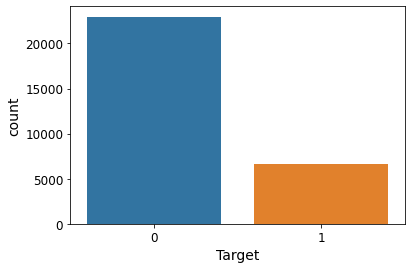

[22967, 6599]


In [25]:
#Check the frequency of each label
sns.countplot(y)
plt.show()

print(list(y.value_counts().sort_index()))

**As a standard practice, evaluate autocorrelation before splitting the dataset to ensure the data are not time series.**

In [1380]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
'''
f, axes = plt.subplots(23,2,figsize=(10,80))
for i,ax in enumerate(axes):
    plot_acf(df.iloc[:,i], zero=False, ax=ax[0], lags=30, title='Autocorrelation for {}'.format(df.columns[i]))
    plot_pacf(df.iloc[:,i], zero=False, ax=ax[1], lags=30, title='Parial Autocorrelation for {}'.format(df.columns[i]))
'''

"\nf, axes = plt.subplots(23,2,figsize=(10,80))\nfor i,ax in enumerate(axes):\n    plot_acf(df.iloc[:,i], zero=False, ax=ax[0], lags=30, title='Autocorrelation for {}'.format(df.columns[i]))\n    plot_pacf(df.iloc[:,i], zero=False, ax=ax[1], lags=30, title='Parial Autocorrelation for {}'.format(df.columns[i]))\n"

Note:<br>
Since autocorrelation is not present in any feature, it is safe to say that we are not dealing with time series data.<br>
As a result, it is allowed to randomly split the dataset into train/test sets.

## Create train/test sets

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y) # stratify by target y

print(f'X_train.shape: {X_train.shape}')
print(f'X_test.shape: {X_test.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'y_test.shape: {y_test.shape}')

X_train.shape: (23652, 13)
X_test.shape: (5914, 13)
y_train.shape: (23652,)
y_test.shape: (5914,)


**Note:** <br>
It's important to have similar proportions of each group/class between the training and test set. Therefore, we'll determine if the dataset was equally split.

In [27]:
# Define custom function
def check_dataset_balance(series):
    
    # find unique values
    unique = series.value_counts()
    display(unique)
    
    # plot a pie chart to see if data are balanced
    plt.pie(x=unique, explode=[0.05]*len(unique), autopct='%1.1f%%', colors=sns.color_palette('pastel'))
    plt.show()

0    18373
1     5279
Name: Target, dtype: int64

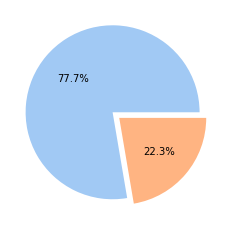

0    4594
1    1320
Name: Target, dtype: int64

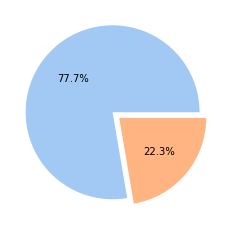

In [28]:
# Verify that the train and test sets are equally split

# Call the function with series=y_train
check_dataset_balance(y_train)

# Call the function with series=y_test
check_dataset_balance(y_test)

# Part 1

# a) Select Performance Measures

For this assignment, it was decided that the principal performance measure to use is Accuracy.

# b) Select and Train Model(s)

## Pipeline - Baseline

Create Baseline model pipeline

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

""" Note: feature scaling will not be applied because 
tree-based algorithms are insenstive to the variance in the data."""

# Define num_features
num_features

# Define cat_features
cat_features

# Determine model
model = DecisionTreeClassifier(random_state=42)

# Build preprocessing pipeline for num_features (DT does not require scaling)
num_transformer = Pipeline([
    ('imputer1', SimpleImputer(strategy='median'))
])

# Build preprocessing pipeline for cat_features (DT does not require scaling)
cat_transformer = Pipeline([
    ('imputer2', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder()) 
])

# Bundle preprocessing pipelines
preprocessor = ColumnTransformer([
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
])

# Build Full pipeline (preprocessor + estimator)
full_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('estimator', model)
])

# Fit (and transform) the pipeline to training data to create a model as an object
dtc_baseline = full_pipeline.fit(X_train, y_train)


# c) Performance Measures

## Confusion Matrix - Baseline

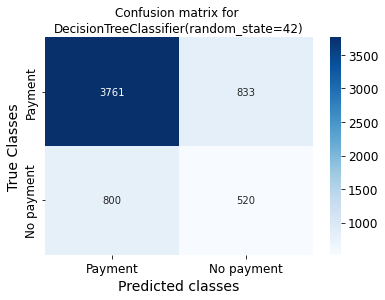

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Define model
model = dtc_baseline

# Make predictions
yhat_test_baseline = model.predict(X_test)

# Plot Confusion Matrix
class_names = ['Payment', 'No payment']
sns.heatmap(confusion_matrix(y_test, yhat_test_baseline), annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Settings
plt.title('Confusion matrix for \n{}'.format(model['estimator']))
plt.xlabel('Predicted classes')
plt.ylabel('True Classes');

## Classification Report - Baseline

In [31]:
from sklearn.metrics import classification_report

# Define model
model = dtc_baseline

# Make predictions
yhat_test_baseline = model.predict(X_test)
yhat_train_baseline = model.predict(X_train)

target_names = ['No Default', 'Default']

# Create the classification report
report_baseline = classification_report(y_test, yhat_test_baseline, target_names=target_names, digits=3, output_dict=True)
precision_baseline = report_baseline['Default']['precision'] # binary: precisin of positive class only
recall_baseline = report_baseline['Default']['recall'] # binary: recall of postive class only

# Print the Classification Report
print('Classification Report for Test Set\n' + ("="*55) + '\n' + classification_report(y_test, yhat_test_baseline, target_names=target_names, digits=3))
print("="*55)

# Print the accuracy score (%)
acc_test_baseline = report_baseline['accuracy']
print('Accuracy (test) for {} \n     >>> {}%'.format(model['estimator'], round(acc_test_baseline*100, 1))) 

# Display Accuracy(%) using the testing set 
acc_train_baseline = accuracy_score(y_train, yhat_train_baseline)
print('Accuracy (train) for {} \n     >>> {}%'.format(model['estimator'], round(acc_train_baseline*100, 1))) 

Classification Report for Test Set
              precision    recall  f1-score   support

  No Default      0.825     0.819     0.822      4594
     Default      0.384     0.394     0.389      1320

    accuracy                          0.724      5914
   macro avg      0.604     0.606     0.605      5914
weighted avg      0.726     0.724     0.725      5914

Accuracy (test) for DecisionTreeClassifier(random_state=42) 
     >>> 72.4%
Accuracy (train) for DecisionTreeClassifier(random_state=42) 
     >>> 99.9%


In [32]:
# Compute TP, TN, FP, FN
tn_b, fp_b, fn_b, tp_b = confusion_matrix(y_test, yhat_test_baseline).ravel()

# d) Hyperparameter Tuning - Manual

In [33]:
# Access the hyperparameter keys of the estimator
from pprint import pprint
model=DecisionTreeClassifier()
pprint(model.get_params())

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}


After reading about hyperparameter tuning for Decision Tree, the best ones to tunes are:<br>
- max_depth
- min_samples_split
- min_samples_leaf

As a result, we will tune those hyperparameters in this assignment.

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define num_features
num_features

# Define cat_features
cat_features

# Determine model with hyperparameters
model = DecisionTreeClassifier(max_depth=5,
                               min_samples_split=20,
                               min_samples_leaf=10,
                               random_state=42)

# Build preprocessing pipeline for num_features (DT does not require scaling)
num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])

# Build preprocessing pipeline for cat_features (DT does not require scaling)
cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first')) #
])

# Bundle preprocessing pipelines
preprocessor = ColumnTransformer([
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
])

# Build Full pipeline (preprocessor + estimator)
full_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('estimator', model)
])

# Fit (and transform) the pipeline to training data to create a model as an object
dtc_manual = full_pipeline.fit(X_train, y_train)

%%time

UsageError: Line magic function `%%time` not found.


## Confusion Matrix - Manual

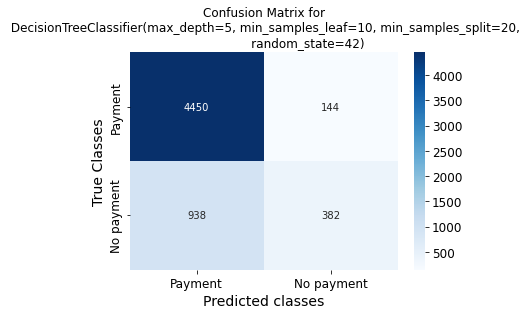

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix

# Define model
model = dtc_manual

# Make predictions
yhat_test_manual = model.predict(X_test)

# Plot Confusion Matrix
class_names = ['Payment', 'No payment']
sns.heatmap(confusion_matrix(y_test, yhat_test_manual), annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Settings
plt.title('Confusion Matrix for\n {}'.format(model['estimator']))
plt.xlabel('Predicted classes')
plt.ylabel('True Classes');

## Classification Report - Manual

In [36]:
from sklearn.metrics import classification_report

# Define model
model = dtc_manual

#  Make predictions
yhat_test_manual = model.predict(X_test)
yhat_train_manual = model.predict(X_train)

target_names = ['No Default', 'Default']

# Create the classification report
report_manual = classification_report(y_test, yhat_test_manual, target_names=target_names, digits=3, output_dict=True)
precision_manual = report_manual['Default']['precision'] # binary: positive class only
recall_manual = report_manual['Default']['recall'] # binary: positive class only

# Print the Classification Report
print('Classification Report for Test Set\n' + ("="*55) + '\n' + classification_report(y_test, yhat_test_manual, target_names=target_names, digits=3))
print("="*55)

# Print the accuracy score (%)
acc_test_manual = report_manual['accuracy']
print('Accuracy (test) for {} \n     >>> {} %'.format(model['estimator'], round(acc_test_manual*100, 1))) 

# Display Accuracy(%) using the testing set 
acc_train_manual = accuracy_score(y_train, yhat_train_manual)
print('Accuracy (train) for {} \n     >>> {} %'.format(model['estimator'], round(acc_train_manual*100, 1))) 

Classification Report for Test Set
              precision    recall  f1-score   support

  No Default      0.826     0.969     0.892      4594
     Default      0.726     0.289     0.414      1320

    accuracy                          0.817      5914
   macro avg      0.776     0.629     0.653      5914
weighted avg      0.804     0.817     0.785      5914

Accuracy (test) for DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=20,
                       random_state=42) 
     >>> 81.7 %
Accuracy (train) for DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=20,
                       random_state=42) 
     >>> 82.0 %


In [37]:
# Compute TP, TN, FP, FN
tn_t, fp_t, fn_t, tp_t = confusion_matrix(y_test, yhat_test_manual).ravel()

# e) Tuning Evaluation - Manual

In [38]:
print(f"""
>> Baseline Model:
The Confusion Matrix shows that {tn_b} out of {y_test.value_counts()[0]} values ({round(tn_b/y_test.value_counts()[0]*100,1)}%) in the testing set was correctly classified as TN (specificity).
Whereas {tp_b} out of {y_test.value_counts()[1]} values ({round(tp_b/y_test.value_counts()[1]*100,1)}%) in the testing set was correctly classified as TP (recall/sensitivity).
The total of correct predictions (accuracy) is {tn_b+tp_b} out of {y_test.shape[0]} values ({round((tn_b+tp_b)/y_test.shape[0]*100,1)}%).

>> Manually tuned Model (max_depth=5, min_samples_split=20, min_samples_leaf=10):
The Confusion Matrix shows that {tn_t} out of {y_test.value_counts()[0]} values ({round(tn_t/y_test.value_counts()[0]*100,1)}%) in the testing set was correctly classified as TN (specificity).
Whereas {tp_t} out of {y_test.value_counts()[1]} values ({round(tp_t/y_test.value_counts()[1]*100,1)}%) in the testing set was correctly classified as TP (recall/sensitivity).
The total of correct predictions (accuracy) is {tn_t+tp_t} out of {y_test.shape[0]} values ({round((tn_t+tp_t)/y_test.shape[0]*100,1)}%).

>> RECAP

Baseline model:
Specificity = {round(tn_b/y_test.value_counts()[0]*100,1)}%
Precision = {round(precision_baseline*100,1)}%
Recall = {round(recall_baseline*100,1)}%
Total correct (accuracy) = {round(acc_test_baseline*100,1)}%


Manually tuned model:
Specificity = {round(tn_t/y_test.value_counts()[0]*100,1)}%
Precision = {round(precision_manual*100,1)}%
Recall = {round(recall_manual*100,1)}%
Total correct (accuracy) = {round(acc_test_manual*100,1)}%


As we can see, manually tuning the hyperparameters selected improved drastically the specificity and precision but at the same time reduced the recall. 
Overall, manually tuning the model improved the accuracy by {round((acc_test_manual - acc_test_baseline)*100,1)}%.

As a result, we can determine that tuning hyperparameters instead of using default settings can grealty improve the model performance.
Hyperparameters tuning should be done in a way to improve the performance measure most appropriate for the research/business question.
""")


>> Baseline Model:
The Confusion Matrix shows that 3761 out of 4594 values (81.9%) in the testing set was correctly classified as TN (specificity).
Whereas 520 out of 1320 values (39.4%) in the testing set was correctly classified as TP (recall/sensitivity).
The total of correct predictions (accuracy) is 4281 out of 5914 values (72.4%).

>> Manually tuned Model (max_depth=5, min_samples_split=20, min_samples_leaf=10):
The Confusion Matrix shows that 4450 out of 4594 values (96.9%) in the testing set was correctly classified as TN (specificity).
Whereas 382 out of 1320 values (28.9%) in the testing set was correctly classified as TP (recall/sensitivity).
The total of correct predictions (accuracy) is 4832 out of 5914 values (81.7%).

>> RECAP

Baseline model:
Specificity = 81.9%
Precision = 38.4%
Recall = 39.4%
Total correct (accuracy) = 72.4%


Manually tuned model:
Specificity = 96.9%
Precision = 72.6%
Recall = 28.9%
Total correct (accuracy) = 81.7%


As we can see, manually tuning t

- Identified outliers and determined which one(s) to keep for the modelling process.
- Performed correlation analysis and checked for multicollinearity.# Question 2 (4 pts) 

Try to build the decision tree which you built for the previous question, but this time by RandomizedSearchCV over hyper-parameters. Compare the results.

# Part 2

# a) Hyperparameter Tuning - Search 

In [39]:
# Look at hyperparameters used by our current estimator
from pprint import pprint
model=DecisionTreeClassifier()
print('Default hyperparameters:\n')
pprint(model.get_params())

Default hyperparameters:

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}


I should use hyperparameter search with the same keys used earlier:<br>
- max_depth
- min_samples_split
- min_samples_leaf

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.fixes import loguniform
from scipy.stats import uniform
from scipy.stats import randint
from pprint import pprint
from time import time
t0 = time()

# Define num_features
num_features

# Define cat_features
cat_features

# Determine model
model = DecisionTreeClassifier()

# Build preprocessing pipeline for num_features (DT does not require scaling)
num_transformer = Pipeline([
    ('imputer1', SimpleImputer())
])

# Build preprocessing pipeline for cat_features (DT does not require scaling)
cat_transformer = Pipeline([
    ('imputer2', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder()), 
])

# Bundle preprocessing pipelines
preprocessor = ColumnTransformer([
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features),
])

# Build Full pipeline (preprocessor + estimator)
full_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('estimator', model),
])


# Define hyperparameters search space and distributions to sample from
param_dist = {
    'preprocessor__num__imputer1__strategy': ['mean','median'],
    'preprocessor__cat__encoder__drop': [None, 'first'],
    'estimator__max_depth': randint(2, 10), ## uniform discrete random variable
    'estimator__min_samples_split': randint(2, 40), 
    'estimator__min_samples_leaf': randint(2, 20),
}

print("Search has started...")

# Explore the hyperparameters search space
search = RandomizedSearchCV(full_pipeline, param_dist, cv=5, scoring='accuracy', n_iter=100, verbose=1, random_state=42, n_jobs=-1)

# Fit search on the training data to create the model 
dtc = search.fit(X_train, y_train)

# View best search
print('\nBest hyperparameters search:')
pprint(dtc.best_params_)

print(f'\nElasped Time: {round(time()-t0)} sec') # 50sec
playsound('/home/sylvie/Desktop/Codes/jnglbell.wav')

Search has started...
Fitting 5 folds for each of 100 candidates, totalling 500 fits

Best hyperparameters search:
{'estimator__max_depth': 4,
 'estimator__min_samples_leaf': 18,
 'estimator__min_samples_split': 9,
 'preprocessor__cat__encoder__drop': None,
 'preprocessor__num__imputer1__strategy': 'mean'}

Elasped Time: 58 sec


In [41]:
'''
from sklearn import tree
from graphviz import Source
from IPython.display import SVG

# Define model
model = DecisionTreeClassifier(max_depth=5,
                               min_samples_leaf=2,
                               min_samples_split=9,
                              ).fit(X_train, y_train)

# Visualize
graph = Source(tree.export_graphviz(model, out_file=None, feature_names=X.columns, class_names=['No Default', 'Default'], filled=True))
display(SVG(graph.pipe(format='svg')))

############  OR  ###############

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, feature_names=X.columns, class_names=['No Default', 'Default'], filled=True)
'''

"\nfrom sklearn import tree\nfrom graphviz import Source\nfrom IPython.display import SVG\n\n# Define model\nmodel = DecisionTreeClassifier(max_depth=5,\n                               min_samples_leaf=2,\n                               min_samples_split=9,\n                              ).fit(X_train, y_train)\n\n# Visualize\ngraph = Source(tree.export_graphviz(model, out_file=None, feature_names=X.columns, class_names=['No Default', 'Default'], filled=True))\ndisplay(SVG(graph.pipe(format='svg')))\n\n############  OR  ###############\n\nfig = plt.figure(figsize=(25,20))\n_ = tree.plot_tree(model, feature_names=X.columns, class_names=['No Default', 'Default'], filled=True)\n"

# b) Performance Measures

## Classification Report - Search

In [42]:
from sklearn.metrics import classification_report

# Define model
model = dtc.best_estimator_ 

#  Make predictions
yhat_test_dtc = model.predict(X_test)
yhat_train_dtc = model.predict(X_train)

target_names = ['No Default', 'Default']

# Create the classification report
report_dtc = classification_report(y_test, yhat_test_dtc, target_names=target_names, digits=3, output_dict=True)
precision_dtc = report_dtc['Default']['precision'] # binary: positive class only
recall_dtc = report_dtc['Default']['recall'] # binary: positive class only

# Print the Classification Report
print('Classification Report for Test Set\n' + ("="*55) + '\n' + classification_report(y_test, yhat_test_dtc, target_names=target_names, digits=3))
print("="*55)

# Print the accuracy score (%)
acc_test_dtc = report_dtc['accuracy']
print(f'Accuracy (test) for {model[1]} \n     >>> {round(acc_test_dtc*100, 1)} %') 

# Display Accuracy(%) using the testing set 
acc_train_dtc = accuracy_score(y_train, yhat_train_dtc)
print(f'Accuracy (train) for {model[1]} \n     >>> {round(acc_train_dtc*100, 1)} %') 

Classification Report for Test Set
              precision    recall  f1-score   support

  No Default      0.827     0.967     0.891      4594
     Default      0.719     0.294     0.417      1320

    accuracy                          0.817      5914
   macro avg      0.773     0.630     0.654      5914
weighted avg      0.802     0.817     0.785      5914

Accuracy (test) for DecisionTreeClassifier(max_depth=4, min_samples_leaf=18, min_samples_split=9) 
     >>> 81.7 %
Accuracy (train) for DecisionTreeClassifier(max_depth=4, min_samples_leaf=18, min_samples_split=9) 
     >>> 81.9 %


# c) Tuning Evaluation - Search

To determine if RandomizedSearchCV yielded a better model than baseline and manually tuning hyperparameters, we'll compare them.

In [43]:
print(f"""

ACCURACY
Baseline model (no tuning): {round(acc_test_baseline*100,2)}%
Hyperparameters tuning (manual): {round(acc_test_manual*100,2)}%
Hyperparameters tuning (search): {round(acc_test_dtc*100,2)}%

PRECISION
Baseline model (no tuning): {round(precision_baseline,2)}
Hyperparameters tuning (manual): {round(precision_manual,2)}
Hyperparameters tuning (search): {round(precision_dtc,2)}

RECALL
Baseline model (no tuning): {round(recall_baseline,2)}
Hyperparameters tuning (manual): {round(recall_manual,2)}
Hyperparameters tuning (search): {round(recall_dtc,2)}

""")



ACCURACY
Baseline model (no tuning): 72.39%
Hyperparameters tuning (manual): 81.7%
Hyperparameters tuning (search): 81.67%

PRECISION
Baseline model (no tuning): 0.38
Hyperparameters tuning (manual): 0.73
Hyperparameters tuning (search): 0.72

RECALL
Baseline model (no tuning): 0.39
Hyperparameters tuning (manual): 0.29
Hyperparameters tuning (search): 0.29




In [44]:
print(f"""

From the results above, we can say that RandomizedSearchCV is the same as the manual hyperparameters tuning.
The major difference is from no tuning at all (using default settings) and adjusting some of the hyperparameters. 
This makes sense if you look at the default hyperparameters settings for DecisionTreeClassifier:

{DecisionTreeClassifier().get_params()}

Some default hyperparameters are already good:
Criterion: 'gini'
splitter: 'best'

By others greatly negatively impact the model:
max_depth: None
        > expand the nodes until all leaves are pure causing potential overfitting the training data and not generalize well
min_samples_leaf: 1
        > if this number is too low, it could cause overfitting the training data and not generalize well
min_samples_split: 2
        > if this number is too low, it could cause overfitting the training data and not generalize well
min_impurity_decrease: 0
        > if this number is too low, it could cause overfitting the training data and not generalize well
max_leaf_nodes: None
        > unlimited number of leaf nodes, it could cause overfitting the training data and not generalize well

It seems clear that the default hyperparameter settings for DecisionTreeClassifier are at high risk of overfitting the training data
and as a result not perform well on the testing data. Therefore, putting 'constraint' to those hyperparameters will most likely improve
the overall performance of the model. 

My manual pick for hyperparameters were:
max_depth=5
min_samples_leaf=10
min_samples_split=20

RandomizedSearchCV pick were:
max_depth={dtc.best_params_['estimator__max_depth']}
min_samples_leaf={dtc.best_params_['estimator__min_samples_leaf']}
min_samples_split={dtc.best_params_['estimator__min_samples_split']}

The majority of hyperparameter settings are close to each other and the third one not so far either.
That would explain why the performance metrics between manually picking and using RandomizedSearchCV is almost identical.

""")



From the results above, we can say that RandomizedSearchCV is the same as the manual hyperparameters tuning.
The major difference is from no tuning at all (using default settings) and adjusting some of the hyperparameters. 
This makes sense if you look at the default hyperparameters settings for DecisionTreeClassifier:

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}

Some default hyperparameters are already good:
Criterion: 'gini'
splitter: 'best'

By others greatly negatively impact the model:
max_depth: None
        > expand the nodes until all leaves are pure causing potential overfitting the training data and not generalize well
min_samples_leaf: 1
        > if this number is too low, it could cause overfitting the training 

# Part 3 

# Pipeline - RFC

In [45]:
# Look at hyperparameters used by our current estimator
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint
model=RandomForestClassifier()
print('Default hyperparameters:\n')
pprint(model.get_params())

Default hyperparameters:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


For consistency, we will tune the same 3 hyperparameters than Decision Tree Classifier:

- max_depth
- min_samples_leaf
- min_samples_split

In addition, RandomForestClassifer have `n_estimators` hyperparameter that is also important to consider to tune for best results.


In [46]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.fixes import loguniform
from scipy.stats import uniform
from scipy.stats import randint
from pprint import pprint
from time import time
t0 = time()


""" Note: feature scaling will not be applied because 
tree-based algorithms are insenstive to the variance in the data."""

# Define num_features
num_features

# Define cat_features
cat_features

# Determine model
model = RandomForestClassifier(warm_start=True)

# Build preprocessing pipeline for num_features (DT does not require scaling)
num_transformer = Pipeline([
    ('imputer1', SimpleImputer())
])

# Build preprocessing pipeline for cat_features (DT does not require scaling)
cat_transformer = Pipeline([
    ('imputer2', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder()), 
])

# Bundle preprocessing pipelines
preprocessor = ColumnTransformer([
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features),
])

# Build Full pipeline (preprocessor + estimator)
full_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('estimator', model),
])

# Define hyperparameters search space and distributions to sample from
param_dist = {
    'preprocessor__num__imputer1__strategy': ['mean','median'],
    'preprocessor__cat__encoder__drop': [None, 'first'],
    'estimator__max_depth': randint(2, 10), # uniform discrete random variable
    'estimator__min_samples_split': randint(2, 40),
    'estimator__min_samples_leaf': randint(2, 20),
    'estimator__n_estimators': randint(50, 150),
}

print("Search has started...")

# Explore the hyperparameters search space
search = RandomizedSearchCV(full_pipeline, param_dist, cv=3, scoring='accuracy', n_iter=100, verbose=1, random_state=42, n_jobs=-1)

# Fit search on the training data to create the model 
rfc = search.fit(X_train, y_train)

# Report the best search results
print('\nBest hyperparameters search:')
pprint(rfc.best_params_)
print("--"*50)

print('\nBest estimator characteristics:')
pprint(rfc.best_estimator_[1])

print(f'\nElasped Time: {round(time()-t0)} sec') # 4 min
playsound('/home/sylvie/Desktop/Codes/jnglbell.wav')

Search has started...
Fitting 3 folds for each of 100 candidates, totalling 300 fits

Best hyperparameters search:
{'estimator__max_depth': 8,
 'estimator__min_samples_leaf': 3,
 'estimator__min_samples_split': 33,
 'estimator__n_estimators': 97,
 'preprocessor__cat__encoder__drop': None,
 'preprocessor__num__imputer1__strategy': 'median'}
----------------------------------------------------------------------------------------------------

Best estimator characteristics:
RandomForestClassifier(max_depth=8, min_samples_leaf=3, min_samples_split=33,
                       n_estimators=97, warm_start=True)

Elasped Time: 319 sec


## Performance - RFC

In [47]:
from sklearn.metrics import classification_report

# Define model
model = rfc.best_estimator_ 

#  Make predictions
yhat_test_rfc = model.predict(X_test)
yhat_train_rfc = model.predict(X_train)

target_names = ['No Default', 'Default']

# Create the classification report
report_rfc = classification_report(y_test, yhat_test_rfc, target_names=target_names, digits=3, output_dict=True)
precision_rfc = report_rfc['Default']['precision'] # binary: positive class only
recall_rfc = report_rfc['Default']['recall'] # binary: positive class only

# Print the Classification Report
print('Classification Report for Test Set\n' + ("="*55) + '\n' + classification_report(y_test, yhat_test_rfc, target_names=target_names, digits=3))
print("="*55)

# Display Accuracy(%) using the testing set 
acc_train_rfc = accuracy_score(y_train, yhat_train_rfc)
print(f'Accuracy (train) for {model[1]} \n     >>> {round(acc_train_rfc*100, 1)} %') 

# Print the accuracy score (%)
acc_test_rfc = report_rfc['accuracy']
print(f'Accuracy (test) for {model[1]} \n     >>> {round(acc_test_rfc*100, 1)} %') 

# Print the accuracy score (%)
print(f'Mean accuracy (CV) for {model[1]} \n     >>> {round(rfc.best_score_*100,1)}%') # mean cv score of estimator (accuracy)

Classification Report for Test Set
              precision    recall  f1-score   support

  No Default      0.827     0.967     0.891      4594
     Default      0.718     0.295     0.419      1320

    accuracy                          0.817      5914
   macro avg      0.773     0.631     0.655      5914
weighted avg      0.803     0.817     0.786      5914

Accuracy (train) for RandomForestClassifier(max_depth=8, min_samples_leaf=3, min_samples_split=33,
                       n_estimators=97, warm_start=True) 
     >>> 82.1 %
Accuracy (test) for RandomForestClassifier(max_depth=8, min_samples_leaf=3, min_samples_split=33,
                       n_estimators=97, warm_start=True) 
     >>> 81.7 %
Mean accuracy (CV) for RandomForestClassifier(max_depth=8, min_samples_leaf=3, min_samples_split=33,
                       n_estimators=97, warm_start=True) 
     >>> 81.9%


## Learning Curve - RFC

Elasped Time: 0 sec
----------------------------------

Training accuracy (end): 82.5%
CV accuracy (end): 81.8%



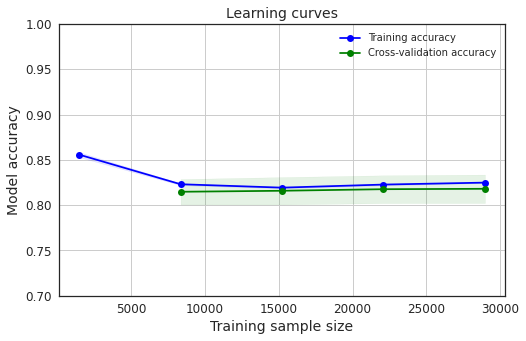

In [1507]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import learning_curve
from time import time
t0 = time()


"""A cross-validation generator splits the whole dataset k times in training
and test data. Subsets of the training set with varying sizes will be used
to train the estimator and a score for each training subset size and the
test set will be computed. Afterwards, the scores will be averaged over
all k runs for each training subset size. The curve plots the mean score 
for the k splits, and the filled in area suggests the variability of the 
cross-validation by plotting one std dev above and below the mean for each split."""


# Define X and y
X = df[features] 
y = df['Target'] 

# Define model (best estimator characteristics from RS)
model = rfc.best_estimator_

# Settings
plt.figure(figsize=(8,5))
metrics = 'accuracy'
cv = 50 # number of folds for StratifiedKFold()
sizes = np.linspace(start=0.05, stop=1.0, num=5) # start@beginning(5%), stop@end(100%)show all pts, 5 pts/curve

# Split the entire dataset into train/val
train_sizes, train_scores, val_scores = learning_curve(model, X, y, scoring=metrics, cv=cv, train_sizes=sizes)   

# Calculate training and test mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curves
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=7, label='Training accuracy')
plt.plot(train_sizes, val_mean, color='green', marker='o', markersize=7, label='Cross-validation accuracy')
# plt.axhline(y=0.8, linestyle='--', color='grey', label='Desired accuracy')  

# Add Std deviations
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')

# Settings
plt.ylim(0.7, 1.0)
plt.xlabel('Training sample size')
plt.ylabel('Model accuracy')
plt.title('Learning curves', fontsize=14)
plt.grid()
plt.legend(loc='best');

print(f'Elasped Time: {round(time()-t0)} sec') # 7 min
print("--"*17)

# Print accuracy at the end of learning
print(f'\nTraining accuracy (end): {round((train_scores[4].mean())*100,1)}%')
print(f'CV accuracy (end): {round((val_scores[4].mean())*100,1)}%\n')

from playsound import playsound
playsound('/home/sylvie/Desktop/Codes/jnglbell.wav')

The learning curve for RFC looks good. As expected, the accuracy goes down at the beginning with the training set and then stabilizes after 15k samples. However, the CV set slightly increase at the beginning but is pretty much a flat line meaning that it reached its learning potential almost at the beginning and adding more instances is not improving its accuracy. However, the standard deviation of the CV set is really large compared to the training set which is not desired. The generalization gap is 0.8% which is good. Based on my reading, adding more instances would most likely not improve model accuracy and could lead to overfitting the training data which would be detrimental for generalization. 

# Pipeline - Adaboost

In [1428]:
# Look at default hyperparameters
from sklearn.ensemble import AdaBoostClassifier
from pprint import pprint

model = AdaBoostClassifier()
print('Default hyperparameters:\n')
pprint(model.get_params())

Default hyperparameters:

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}


Hyperparameters are different than tree-based algorithms. Therefore, we will perform a search on the following:
- n_estimators
- leanring_rate

For consistency, we will keep the default base_estimator which is DTC

In [1429]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.fixes import loguniform
from scipy.stats import uniform, randint
from pprint import pprint
from time import time
t0 = time()


""" Note: feature scaling will not be applied because 
tree-based algorithms are insenstive to the variance in the data."""


# Define num_features
num_features

# Define cat_features
cat_features

# Determine model
model = AdaBoostClassifier() # default best_estimator = DecisionTreeClassifier

# Build preprocessing pipeline for num_features (DT does not require scaling)
num_transformer = Pipeline([
    ('imputer1', SimpleImputer())
])

# Build preprocessing pipeline for cat_features (DT does not require scaling)
cat_transformer = Pipeline([
    ('imputer2', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder()), 
])

# Bundle preprocessing pipelines
preprocessor = ColumnTransformer([
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features),
])

# Build Full pipeline (preprocessor + estimator)
full_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('estimator', model),
])

# Define hyperparameters search space and distributions to sample from
param_dist = {
    'preprocessor__num__imputer1__strategy': ['mean','median'],
    'preprocessor__cat__encoder__drop': [None, 'first'],
    'estimator__n_estimators': randint(10, 500), # uniform discrete random variable
    'estimator__learning_rate': uniform(loc=0.001, scale=1), # uniform continuous random variable on (loc, loc + scale)
}

print("Search has started...")

# Explore the hyperparameters search space
search = RandomizedSearchCV(full_pipeline, param_dist, cv=3, scoring='accuracy', n_iter=100, verbose=1, random_state=42, n_jobs=-1)

# Fit search on the training data to create the model 
abc = search.fit(X_train, y_train)

# Report the best search results
print('\nBest hyperparameters search:')
pprint(abc.best_params_)
print("="*55)

print('\nBest estimator characteristics:')
pprint(abc.best_estimator_[1])

print(f'\nElasped Time: {round(time()-t0)} sec') # 18min
playsound('/home/sylvie/Desktop/Codes/jnglbell.wav')

Search has started...
Fitting 3 folds for each of 100 candidates, totalling 300 fits

Best hyperparameters search:
{'estimator__learning_rate': 0.296633685837714,
 'estimator__n_estimators': 143,
 'preprocessor__cat__encoder__drop': 'first',
 'preprocessor__num__imputer1__strategy': 'median'}

Best estimator characteristics:
AdaBoostClassifier(learning_rate=0.296633685837714, n_estimators=143)

Elasped Time: 1064 sec


## Performance - AdaBoost

In [1560]:
from sklearn.metrics import classification_report

# Define model
model = abc.best_estimator_ 

#  Make predictions
yhat_test_abc = model.predict(X_test)
yhat_train_abc = model.predict(X_train)

target_names = ['No Default', 'Default']

# Create the classification report
report_abc = classification_report(y_test, yhat_test_abc, target_names=target_names, digits=3, output_dict=True)
precision_abc = report_abc['Default']['precision'] # binary: positive class only
recall_abc = report_abc['Default']['recall'] # binary: positive class only

# Print the Classification Report
print('Classification Report for Test Set\n' + ("="*55) + '\n' + classification_report(y_test, yhat_test_abc, target_names=target_names, digits=3))
print("="*55)


# Display Accuracy(%) using the testing set 
acc_train_abc = accuracy_score(y_train, yhat_train_abc)
print(f'Accuracy (train) for {model[1]} \n     >>> {round(acc_train_abc*100, 1)} %') 

# Print the accuracy score (%)
acc_test_abc = report_abc['accuracy']
print(f'Accuracy (test) for {model[1]} \n     >>> {round(acc_test_abc*100, 1)} %') 

# Print the accuracy score (%)
print(f'Mean accuracy (CV) for {model[1]} \n     >>> {round(abc.best_score_*100,1)}%') # mean cv score of estimator (accuracy)

Classification Report for Test Set
              precision    recall  f1-score   support

  No Default      0.834     0.956     0.891      4594
     Default      0.687     0.339     0.454      1320

    accuracy                          0.818      5914
   macro avg      0.760     0.647     0.672      5914
weighted avg      0.801     0.818     0.793      5914

Accuracy (train) for AdaBoostClassifier(learning_rate=0.296633685837714, n_estimators=143) 
     >>> 81.9 %
Accuracy (test) for AdaBoostClassifier(learning_rate=0.296633685837714, n_estimators=143) 
     >>> 81.8 %
Mean accuracy (CV) for AdaBoostClassifier(learning_rate=0.296633685837714, n_estimators=143) 
     >>> 81.8%


## Learning Curve - AdaBoost

Elasped Time: 790 sec
----------------------------------

Training accuracy (end): 81.9%
CV accuracy (end): 81.8%



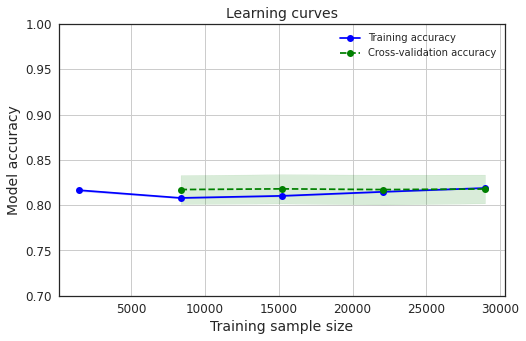

In [1508]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import learning_curve
from time import time
t0 = time()


"""A cross-validation generator splits the whole dataset k times in training
and test data. Subsets of the training set with varying sizes will be used
to train the estimator and a score for each training subset size and the
test set will be computed. Afterwards, the scores will be averaged over
all k runs for each training subset size. The curve plots the mean score 
for the k splits, and the filled in area suggests the variability of the 
cross-validation by plotting one std dev above and below the mean for each split."""


# Define X and y
X = df[features] 
y = df['Target'] 

# Define model (best estimator characteristics from RS)
model = abc.best_estimator_

# Settings
plt.figure(figsize=(8,5))
metrics = 'accuracy'
cv = 50 # number of folds for StratifiedKFold()
sizes = np.linspace(start=0.05, stop=1.0, num=5) # start@beginning(5%), stop@end(100%)show all pts, 5 pts/curve

# Split the entire dataset into train/val
train_sizes, train_scores, val_scores = learning_curve(model, X, y, scoring=metrics, cv=cv, train_sizes=sizes)   

# Calculate training and test mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curves
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=7, label='Training accuracy')
plt.plot(train_sizes, val_mean, color='green', marker='o', markersize=7, linestyle='--', label='Cross-validation accuracy')
# plt.axhline(y=0.8, linestyle='--', color='grey', label='Desired accuracy')  

# Add Std deviations
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')

# Settings
plt.ylim(0.7, 1.0)
plt.xlabel('Training sample size')
plt.ylabel('Model accuracy')
plt.title('Learning curves', fontsize=14)
plt.grid()
plt.legend(loc='best');

print(f'Elasped Time: {round(time()-t0)} sec') # 13 min
print("--"*17)

# Print accuracy at the end of learning
print(f'\nTraining accuracy (end): {round((train_scores[4].mean())*100,1)}%')
print(f'CV accuracy (end): {round((val_scores[4].mean())*100,1)}%\n')

playsound('/home/sylvie/Desktop/Codes/jnglbell.wav')

<!-- The learning curve for ABC does not look as expected. Normally, the accuracy of the training set starts higher than CV set and slowy goes down with more samples and then plateau. This is not the case here. It starts lower than the CV set and keeps increasing meaning that the model is constantly learning and even capable of further learning since it never plateau. If the learning curve would continue to increase with more samples and the CV curve remains stable or goes down, it could lead to overfitting. However, this is not the case now since the model reached its learning potential on the CV set early and it has maintained its performance. However, there is no generalization gap which would indicate that the accuracy of the training and testing sets would be the same. Although they are really close indeed, they are not identical but again the standard deviation of the CV set is really large making it more difficult to predict the actual model generalization on the testing set. Overall, increasing the training sample size would most likely improve the training accuracy (or would see it stabilize) but would most likely not improve the CV accuracy.  -->

# Pipeline - ETC

In [1434]:
# Look at default hyperparameters
from sklearn.ensemble import ExtraTreesClassifier
from pprint import pprint

model = ExtraTreesClassifier()
print('Default hyperparameters:\n')
pprint(model.get_params())

Default hyperparameters:

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


Very similar to RandomForestClassifer so for consistency we'll tune the same hyperparameters:
- max_depth
- min_samples_leaf
- min_samples_split
- n_estimators

In [1435]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.fixes import loguniform
from scipy.stats import uniform, randint
from pprint import pprint
from time import time
t0 = time()


""" Note: feature scaling will not be applied because 
tree-based algorithms are insenstive to the variance in the data."""


# Define num_features
num_features

# Define cat_features
cat_features

# Determine model
model = ExtraTreesClassifier(warm_start=True)

# Build preprocessing pipeline for num_features (DT does not require scaling)
num_transformer = Pipeline([
    ('imputer1', SimpleImputer())
])

# Build preprocessing pipeline for cat_features (DT does not require scaling)
cat_transformer = Pipeline([
    ('imputer2', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder()),
])

# Bundle preprocessing pipelines
preprocessor = ColumnTransformer([
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features),
])

# Build Full pipeline (preprocessor + estimator)
full_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('estimator', model),
])

# Define hyperparameters search space and distributions to sample from
param_dist = {
    'preprocessor__num__imputer1__strategy': ['mean','median'],
    'preprocessor__cat__encoder__drop': [None, 'first'],
    'estimator__max_depth': randint(2, 10), # uniform discrete random variable
    'estimator__min_samples_split': randint(2, 40),
    'estimator__min_samples_leaf': randint(2, 20),
    'estimator__n_estimators': randint(50, 150),
}

print("Search has started...")

# Explore the hyperparameters search space
n_iter=100
search = RandomizedSearchCV(full_pipeline, param_dist, cv=3, scoring='accuracy', n_iter=n_iter, verbose=1, random_state=42, n_jobs=-1)

# Fit search on the training data to create the model 
etc = search.fit(X_train, y_train)

# Report the best search results
print('\nBest hyperparameters search:')
pprint(etc.best_params_)
print("="*55)

print('\nBest estimator characteristics:')
pprint(etc.best_estimator_[1])

print(f'\nElasped Time: {round(time()-t0)} sec for {n_iter} candidates hyperparameter settings') # 3 min
playsound('/home/sylvie/Desktop/Codes/jnglbell.wav')

Search has started...
Fitting 3 folds for each of 100 candidates, totalling 300 fits

Best hyperparameters search:
{'estimator__max_depth': 9,
 'estimator__min_samples_leaf': 2,
 'estimator__min_samples_split': 10,
 'estimator__n_estimators': 92,
 'preprocessor__cat__encoder__drop': 'first',
 'preprocessor__num__imputer1__strategy': 'median'}

Best estimator characteristics:
ExtraTreesClassifier(max_depth=9, min_samples_leaf=2, min_samples_split=10,
                     n_estimators=92, warm_start=True)

Elasped Time: 149 sec for 100 candidates hyperparameter settings


## Performance - ETC

In [1561]:
from sklearn.metrics import classification_report

# Define model
model = etc.best_estimator_

#  Make predictions
yhat_test_etc = model.predict(X_test)
yhat_train_etc = model.predict(X_train)

target_names = ['No Default', 'Default']

# Create the classification report
report_etc = classification_report(y_test, yhat_test_etc, target_names=target_names, digits=3, output_dict=True)
precision_etc = report_etc['Default']['precision'] # binary: positive class only
recall_etc = report_etc['Default']['recall'] # binary: positive class lonly

# Print the Classification Report
print('Classification Report for Test Set\n' + ("="*55) + '\n' + classification_report(y_test, yhat_test_etc, target_names=target_names, digits=3))
print("="*55)


# Display Accuracy(%) using the testing set 
acc_train_etc = accuracy_score(y_train, yhat_train_etc)
print(f'Accuracy (train) for {model[1]} \n     >>> {round(acc_train_etc*100, 1)} %') 

# Print the accuracy score (%)
acc_test_etc = report_etc['accuracy']
print(f'Accuracy (test) for {model[1]} \n     >>> {round(acc_test_etc*100, 1)} %') 

# Print the accuracy score (%)
print(f'Mean accuracy (CV) for {model[1]} \n     >>> {round(etc.best_score_*100,1)}%') # mean cv score of estimator (accuracy)


Classification Report for Test Set
              precision    recall  f1-score   support

  No Default      0.833     0.958     0.891      4594
     Default      0.693     0.330     0.447      1320

    accuracy                          0.818      5914
   macro avg      0.763     0.644     0.669      5914
weighted avg      0.802     0.818     0.792      5914

Accuracy (train) for ExtraTreesClassifier(max_depth=9, min_samples_leaf=2, min_samples_split=10,
                     n_estimators=92, warm_start=True) 
     >>> 81.9 %
Accuracy (test) for ExtraTreesClassifier(max_depth=9, min_samples_leaf=2, min_samples_split=10,
                     n_estimators=92, warm_start=True) 
     >>> 81.8 %
Mean accuracy (CV) for ExtraTreesClassifier(max_depth=9, min_samples_leaf=2, min_samples_split=10,
                     n_estimators=92, warm_start=True) 
     >>> 81.8%


## Learning Curve - ETC

Elasped Time: 214 sec
----------------------------------
Training accuracy (end): 81.9%
CV accuracy (end): 81.8%



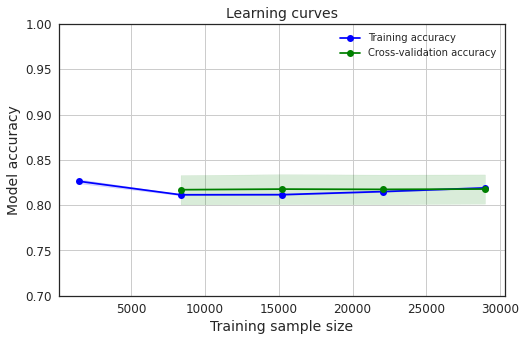

In [1528]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import learning_curve
from time import time
t0 = time()


"""A cross-validation generator splits the whole dataset k times in training
and test data. Subsets of the training set with varying sizes will be used
to train the estimator and a score for each training subset size and the
test set will be computed. Afterwards, the scores will be averaged over
all k runs for each training subset size. The curve plots the mean score 
for the k splits, and the filled in area suggests the variability of the 
cross-validation by plotting one std dev above and below the mean for each split."""


# Define X and y
X = df[features] 
y = df['Target'] 

# Define model (best estimator characteristics from RS)
model = etc.best_estimator_

# Settings
plt.figure(figsize=(8,5))
metrics = 'accuracy'
cv = 50 # number of folds for StratifiedKFold()
sizes = np.linspace(start=0.05, stop=1.0, num=5) # start@beginning(5%), stop@end(100%)show all pts, 5 pts/curve

# Split the entire dataset into train/val
train_sizes, train_scores, val_scores = learning_curve(model, X, y, scoring=metrics, cv=cv, train_sizes=sizes)   

# Calculate training and test mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curves
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=7, label='Training accuracy')
plt.plot(train_sizes, val_mean, color='green', marker='o', markersize=7, label='Cross-validation accuracy')
# plt.axhline(y=0.8, linestyle='--', color='grey', label='Desired accuracy')  

# Add Std deviations
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')

# Settings
plt.ylim(0.7,1.0)
plt.xlabel('Training sample size')
plt.ylabel('Model accuracy')
plt.title('Learning curves', fontsize=14)
plt.grid()
plt.legend(loc='best');


print(f'Elasped Time: {round(time()-t0)} sec') # 4 min
print("--"*17)

# Print accuracy at the end of learning
print(f'Training accuracy (end): {round((train_scores[4].mean())*100,1)}%')
print(f'CV accuracy (end): {round((val_scores[4].mean())*100,1)}%\n')

playsound('/home/sylvie/Desktop/Codes/jnglbell.wav')

<!-- Déjà vue!!
The learning curve for ETC looks identical to ABC... Again, not a typical learning curve that would suggest a "good fit" for the same arguments as mentioned earlier. Adding more training sample may improve the training accuracy but would most likely not improve the CV accuracy. -->

# Pipeline - GBC

In [1488]:
# Look at default hyperparameters
from sklearn.ensemble import GradientBoostingClassifier
from pprint import pprint

model = GradientBoostingClassifier()
print('Default hyperparameters:\n')
pprint(model.get_params())

Default hyperparameters:

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


Again in the same family as RandomForestClassifer and ExtraTreesClassifier so for consistency we'll tune the same hyperparameters:
- max_depth
- min_samples_leaf
- min_samples_split
- n_estimators

In addition, learning_rate just like we did with AdaBoostClassifer

In [1489]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.fixes import loguniform
from scipy.stats import uniform, randint
from pprint import pprint
from time import time
t0 = time()


""" Note: feature scaling will not be applied because 
tree-based algorithms are insenstive to the variance in the data."""


# Define num_features
num_features

# Define cat_features
cat_features

# Determine model
model = GradientBoostingClassifier(warm_start=True)

# Build preprocessing pipeline for num_features (DT does not require scaling)
num_transformer = Pipeline([
    ('imputer1', SimpleImputer())
])

# Build preprocessing pipeline for cat_features (DT does not require scaling)
cat_transformer = Pipeline([
    ('imputer2', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder()),
])

# Bundle preprocessing pipelines
preprocessor = ColumnTransformer([
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features),
])

# Build Full pipeline (preprocessor + estimator)
full_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('estimator', model),
])

# Define hyperparameters search space and distributions to sample from
param_dist = {
    'preprocessor__num__imputer1__strategy': ['mean','median'],
    'preprocessor__cat__encoder__drop': [None, 'first'],
    'estimator__max_depth': randint(2, 10), # uniform discrete random variable
    'estimator__min_samples_split': randint(2, 40),
    'estimator__min_samples_leaf': randint(2, 20),
    'estimator__n_estimators': randint(50, 150),
    'estimator__learning_rate': uniform(loc=0.001, scale=1), # uniform continuous random variable on (loc, loc + scale)
}

print("Search has started...")

# Explore the hyperparameters search space
n_iter=100
search = RandomizedSearchCV(full_pipeline, param_dist, cv=3, scoring='accuracy', n_iter=n_iter, verbose=1, random_state=42, n_jobs=-1) # cv=10

# Fit search on the training data to create the model 
gbc = search.fit(X_train, y_train)

# Report the best search results
print('\nBest hyperparameters search:')
pprint(gbc.best_params_)
print("="*55)

print('\nBest estimator characteristics:')
pprint(gbc.best_estimator_[1])

print(f'\nElasped Time: {round(time()-t0)} sec for {n_iter} candidates hyperparameter settings') # 25min
playsound('/home/sylvie/Desktop/Codes/jnglbell.wav')

Search has started...
Fitting 3 folds for each of 100 candidates, totalling 300 fits

Best hyperparameters search:
{'estimator__learning_rate': 0.30187830981676966,
 'estimator__max_depth': 2,
 'estimator__min_samples_leaf': 18,
 'estimator__min_samples_split': 3,
 'estimator__n_estimators': 51,
 'preprocessor__cat__encoder__drop': 'first',
 'preprocessor__num__imputer1__strategy': 'median'}

Best estimator characteristics:
GradientBoostingClassifier(learning_rate=0.30187830981676966, max_depth=2,
                           min_samples_leaf=18, min_samples_split=3,
                           n_estimators=51, warm_start=True)

Elasped Time: 1470 sec for 100 candidates hyperparameter settings


## Performance - GBC

In [1562]:
from sklearn.metrics import classification_report

# Define model
model = gbc.best_estimator_

#  Make predictions
yhat_test_gbc = model.predict(X_test)
yhat_train_gbc = model.predict(X_train)

target_names = ['No Default', 'Default']

# Create the classification report
report_gbc = classification_report(y_test, yhat_test_gbc, target_names=target_names, digits=3, output_dict=True)
precision_gbc = report_gbc['Default']['precision'] # binary: positive class only
recall_gbc = report_gbc['Default']['recall'] # binary: positive class only

# Print the Classification Report
print('Classification Report for Test Set\n' + ("="*55) + '\n' + classification_report(y_test, yhat_test_gbc, target_names=target_names, digits=3))
print("="*55)

# Display Accuracy(%) using the testing set 
acc_train_gbc = accuracy_score(y_train, yhat_train_gbc)
print(f'\nAccuracy (train) for {model[1]} \n     >>> {round(acc_train_gbc*100, 1)} %') 

# Print the accuracy score (%)
acc_test_gbc = report_gbc['accuracy']
print(f'Accuracy (test) for {model[1]} \n     >>> {round(acc_test_gbc*100, 1)} %') 

# Print the accuracy score (%)
print(f'Mean accuracy (CV) for {model[1]} \n     >>> {round(gbc.best_score_*100,1)}%') # mean cv score of estimator (accuracy)


Classification Report for Test Set
              precision    recall  f1-score   support

  No Default      0.835     0.957     0.892      4594
     Default      0.697     0.344     0.461      1320

    accuracy                          0.820      5914
   macro avg      0.766     0.651     0.676      5914
weighted avg      0.805     0.820     0.796      5914


Accuracy (train) for GradientBoostingClassifier(learning_rate=0.30187830981676966, max_depth=2,
                           min_samples_leaf=18, min_samples_split=3,
                           n_estimators=51, warm_start=True) 
     >>> 82.0 %
Accuracy (test) for GradientBoostingClassifier(learning_rate=0.30187830981676966, max_depth=2,
                           min_samples_leaf=18, min_samples_split=3,
                           n_estimators=51, warm_start=True) 
     >>> 82.0 %
Mean accuracy (CV) for GradientBoostingClassifier(learning_rate=0.30187830981676966, max_depth=2,
                           min_samples_leaf=18, min_sa

## Learning Curve - GBC

Elasped Time: 0 sec
----------------------------------

Training accuracy (end): 82.1%
CV accuracy (end): 81.9%



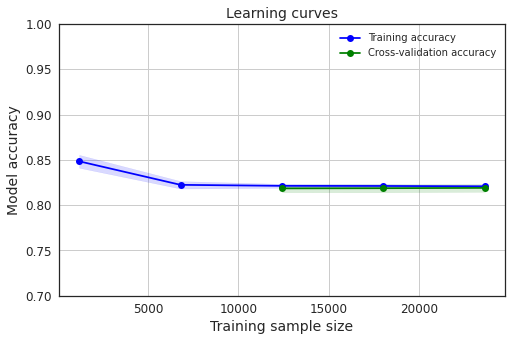

In [1563]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
from time import time
t0 = time()


"""A cross-validation generator splits the whole dataset k times in training
and test data. Subsets of the training set with varying sizes will be used
to train the estimator and a score for each training subset size and the
test set will be computed. Afterwards, the scores will be averaged over
all k runs for each training subset size. The curve plots the mean score 
for the k splits, and the filled in area suggests the variability of the 
cross-validation by plotting one std dev above and below the mean for each split."""

# Define X and y
X = df[features] 
y = df['Target'] 

# Define model (best estimator characteristics from RS)
model = gbc.best_estimator_

# Settings
plt.figure(figsize=(8,5))
metrics = 'accuracy'
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0) # 50 iterations to get smoother mean train and val curves
sizes = np.linspace(start=0.05, stop=1.0, num=5) # start@beginning(5%), stop@end(100%)show all pts, 5 pts/curve

# Split the entire dataset into train/val
train_sizes, train_scores, val_scores = learning_curve(model, X, y, scoring=metrics, cv=cv, train_sizes=sizes, n_jobs=-1)   
 
# Calculate training and test mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# # Calculate train and test mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curves
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=7, label='Training accuracy')
plt.plot(train_sizes, val_mean, color='green', marker='o', markersize=7, label='Cross-validation accuracy')
# plt.axhline(y=0.8, linestyle='--', color='grey', label='Desired accuracy')  

# Add Std dev
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')

# Settings
plt.ylim(0.7, 1)
plt.xlabel('Training sample size')
plt.ylabel('Model accuracy')
plt.title('Learning curves', fontsize=14)
plt.grid()
plt.legend(loc='best');

print(f'Elasped Time: {round(time()-t0)} sec') # 4 min
print("--"*17)

# Print accuracy at the end of learning
print(f'\nTraining accuracy (end): {round((train_scores[4].mean())*100,1)}%')
print(f'CV accuracy (end): {round((val_scores[4].mean())*100,1)}%\n')

playsound('/home/sylvie/Desktop/Codes/jnglbell.wav')

The training curve behavior is typical, that is a sharp decrease at the beginning and then reach a plateau. Between the two curves, the validation learning curve is the one that evaluate the ability of the model to generalize (how well the model is generalizing). As we can see, the CV curve it's pretty much a flat line. One could argue that the model is underfitting but the accuracy score for the validation set is not low which would be an indicator of a model that is unable to learn the training set. One possible explanation could be that the CV set is scarce (too few examples as compared to the training set) and not very representative of the training set and as a result the model struggles to learn from the dataset and does not provide sufficient information to evaluate the ability of the model to generalize. This case can be identified by a learning curve for training set that looks like a good fit (or other fits) and a learning curve for validation set that shows noisy movements and little or no improvement. Potential solutions could be to add more observations to the validation set (https://rstudio-conf-2020.github.io/dl-keras-tf/notebooks/learning-curve-diagnostics.nb.html). 

Just like with RFC, the generalization gap is small (0.3%) suggesting that the accuracy of the training set and the testing set should be really close, which is the case. At the end of the learning process, the training set is stighly higher than the CV set which is expected and normal. Overall, if the training curve and the CV curve reached the point of stability, adding more training sample would not help and could even be detrimental if the training curve would start to learn again and could lead to overfitting the training data and not generalize well. Ideally, "Good fit" leaning curves should be able to improve as sample size increases (converging properly) to a point of stability and eventually achieving a small generalizatin gap at a high score. In addition, the training curve typically have a higher score than the CV curve. 

# Stacking Ensemble

In [1443]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from pprint import pprint
from time import time
t0 = time()

# Bundle all RandomSearch pipelines together
estimators = [
              ('dtc', dtc.best_estimator_[1]),
              ('rfc', rfc.best_estimator_[1]),
              ('abc', abc.best_estimator_[1]),
              ('etc', etc.best_estimator_[1]),
              ('gbc', gbc.best_estimator_[1])
             ]

# Define the blender
blender = LogisticRegression()

# Stack the Ensemble and fit to training data
stacking = StackingClassifier(estimators=estimators, final_estimator=blender).fit(X_train, y_train)

# Print results
print('\n>>> List of base estimators in the Ensemble (and their tuned hyperparameters) fitted on the training data:\n',
      stacking.get_params, '\n')
print("="*70)

print('Final estimator which predicts given the output of all previous estimators:\n',
      stacking.final_estimator, '\n')
print("="*70)

print('The method used by each base estimator:\n',
      stacking.stack_method, '\n')
print("="*70)

print(f'Elasped Time: {round(time()-t0)} sec') # 40 sec
playsound('/home/sylvie/Desktop/Codes/jnglbell.wav')


>>> List of base estimators in the Ensemble (and their tuned hyperparameters) fitted on the training data:
 <bound method _BaseHeterogeneousEnsemble.get_params of StackingClassifier(estimators=[('dtc',
                                DecisionTreeClassifier(max_depth=6,
                                                       min_samples_leaf=2,
                                                       min_samples_split=29)),
                               ('rfc',
                                RandomForestClassifier(max_depth=9,
                                                       min_samples_leaf=2,
                                                       min_samples_split=10,
                                                       n_estimators=92,
                                                       warm_start=True)),
                               ('abc',
                                AdaBoostClassifier(learning_rate=0.296633685837714,
                                               

## Performance - Stacking

In [1574]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# Define model
model = stacking

#  Make predictions
yhat_test_stack = model.predict(X_test)
yhat_train_stack = model.predict(X_train)

# Create the classification report
target_names = ['No Default', 'Default']

report_stack = classification_report(y_test, yhat_test_stack, target_names=target_names, digits=3, output_dict=True)
precision_stack = report_stack['Default']['precision'] # binary: positive class only
recall_stack = report_stack['Default']['recall'] # binary: positive class only

# Print the Classification Report
print('Classification Report for Test Set\n' + ("="*55) + '\n' + classification_report(y_test, yhat_test_stack, target_names=target_names, digits=3))
print("="*55)

# Display accuracy(%) using the training set 
acc_train_stack = accuracy_score(y_train, yhat_train_stack)
print(f'Accuracy (train) for the stacking ensemble \n     >>> {round(acc_train_stack*100, 1)} %') 

# Display accuracy(%) using the testing set 
acc_test_stack = report_stack['accuracy']
print(f'Accuracy (test) for the stacking ensemble \n     >>> {round(acc_test_stack*100, 1)} %') 


Classification Report for Test Set
              precision    recall  f1-score   support

  No Default      0.837     0.957     0.893      4594
     Default      0.702     0.350     0.467      1320

    accuracy                          0.822      5914
   macro avg      0.769     0.654     0.680      5914
weighted avg      0.807     0.822     0.798      5914

Accuracy (train) for the stacking ensemble 
     >>> 82.7 %
Accuracy (test) for the stacking ensemble 
     >>> 82.2 %


## Learning Curve - Stacking

Elasped Time: 2540 sec
----------------------------------

Training accuracy (end): 82.6%
CV accuracy (end): 81.9%



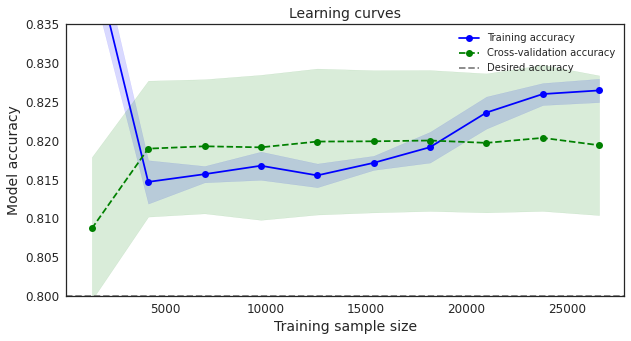

In [1457]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import learning_curve
from time import time
t0 = time()

"""A cross-validation generator splits the whole dataset k times in training
and test data. Subsets of the training set with varying sizes will be used
to train the estimator and a score for each training subset size and the
test set will be computed. Afterwards, the scores will be averaged over
all k runs for each training subset size. The curve plots the mean score 
for the k splits, and the filled in area suggests the variability of the 
cross-validation by plotting one std dev above and below the mean for each split."""

# Define X and y
X = df[features] 
y = df['Target'] 

# Define model
model = ensemble

# Settings
plt.figure(figsize=(10,5))
metrics = 'accuracy'
cv = 10 # number of folds for StratifiedKFold()
sizes = np.linspace(start=0.05, stop=1.0, num=10) # start@beginning(5%), stop@end(100%)show all pts, 10 pts/curve  

# Calculate train and test mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curves
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=7, label='Training accuracy')
plt.plot(train_sizes, val_mean, color='green', marker='o', markersize=7, linestyle='--', label='Cross-validation accuracy')
plt.axhline(y=0.8, linestyle='--', color='grey', label='Desired accuracy')  

# Add Std dev
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')

# Settings
plt.ylim(0.8,0.835)
plt.xlabel('Training sample size')
plt.ylabel('Model accuracy')
plt.title('Learning curves', fontsize=14)
plt.grid()
plt.legend(loc='best');

print(f'Elasped Time: {round(time()-t0)} sec') # 70 min!!!
print("--"*17)

# Print accuracy at the end of learning
print(f'\nTraining accuracy (end): {round((train_scores[9].mean())*100,1)}%')
print(f'CV accuracy (end): {round((val_scores[9].mean())*100,1)}%\n')

playsound('/home/sylvie/Desktop/Codes/jnglbell.wav')

# Part 4

# Results Summary

**Optimization - How does changing hyperparameters effect model performance?**

In [1584]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# List of models to evaluate
def get_models():
    models = {}
    models['Baseline'] = dtc_baseline
    models['Manual tuning'] = dtc_manual
    models['RS tuning'] = dtc.best_estimator_
    return models

# # Models to evaluate
models = get_models()

# Evaluate models and store results
results = []
names = []
for name, model in models.items():
    metrics = {'model': name}
    
    # Make predictions
    yhat_train = model.predict(X_train)
    yhat_test = model.predict(X_test)
    
    # Compute accuracy (train)  
    metrics['Accuracy (train)'] = accuracy_score(y_train, yhat_train)*100
    
    # Compute metrics (test)
    metrics['Accuracy (test)'] = accuracy_score(y_test, yhat_test)*100
    metrics['Precision (test)'] = precision_score(y_test, yhat_test)
    metrics['Recall (test)'] = recall_score(y_test, yhat_test)
    
    # Compute accuracy (CV)
    # metrics['Accuracy (CV)'] = (cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1)).mean()
    
    # Append results and names
    results.append(metrics)
    names.append(name)

# Create DF_results           
df_results = pd.DataFrame(results).set_index('model').T 
df_results.style.highlight_min(color = 'red', axis = 1).highlight_max(color = 'green', axis = 1)

In [1585]:
print(f"""
As expected, the Baseline Decision Tree model with its default hyperparameters that have a high risk of overfitting the training set, is doing just that.
It has an outstanding accuracy on the training set but the generalization on the testing set is poor. This means that performing hyperparameters tuning 
is necessary to obtain a better performance on the testing set. As mentioned in the previous section, tuning down max hyperparameters decreased the overall 
accuracy on the training set but greatly improved the accuracy and precision on the testing set, showing an improvement of {round((acc_test_dtc - acc_test_baseline)*100,1)}% in accuracy. 
This exercise highlight the need to perform hyperparameter optimization (manually with basic knowledge of each hyperparameter) or by using GridSearchCV or 
RandomizedSearchCV. 

As mentioned earlier, tuning manually or with using a search tool didn't make a big difference because the best hyperparameters from RandomSearchCV are close
to those I choose manually. However, using a tool is definitively recommended. One of the disavantage of using GridSearchCV is that it's extremely
computationally expensive because it goes through every possible combination of different parameters and determine which combination is the best.
The grid search approach is fine when we are exploring relatively few combinations but when the hyperparameter search space is large, it is preferable to use
RandomizedSearchCV instead. This method searches the hyperparameter space randomly for the best performance making it fast and less computationally expensive.
Instead of providing a set of values, we provide a statistical distribution for each hyperparameter. In addition, RandomizedSearchCV has been proven to 
outperform GridSearch in many cases (Bergstra and Bengio, 2012).

""")


As expected, the Baseline Decision Tree model with its default hyperparameters that have a high risk of overfitting the training set, is doing just that.
It has an outstanding accuracy on the training set but the generalization on the testing set is poor. This means that performing hyperparameters tuning 
is necessary to obtain a better performance on the testing set. As mentioned in the previous section, tuning down max hyperparameters decreased the overall 
accuracy on the training set but greatly improved the accuracy and precision on the testing set, showing an improvement of 8.3% in accuracy. 
This exercise highlight the need to perform hyperparameter optimization (manually with basic knowledge of each hyperparameter) or by using GridSearchCV or 
RandomizedSearchCV. 

As mentioned earlier, tuning manually or with using a search tool didn't make a big difference because the best hyperparameters from RandomSearchCV are close
to those I choose manually. However, using a tool is defi

**Why do you think certain models performed better/worse? How does this performance line up with known strengths/weakness of these models?**

In [1591]:
from time import time
t0 = time()

# List of models to evaluate
def get_models():
    models = {}
    models['Baseline'] = dtc_baseline
    models['DTC'] = dtc.best_estimator_
    models['RFC'] = rfc.best_estimator_
    models['ABC'] = abc.best_estimator_
    models['ETC'] = etc.best_estimator_
    models['GBC'] = gbc.best_estimator_
    models['Stacking'] = stacking
    return models

# Models to evaluate
models = get_models()

# Evaluate models and store results
results = []
names = []
for name, model in models.items():
    metrics = {'model': name}
    
    # Compute accuracy (train)  
    yhat_train = model.predict(X_train)
    metrics['Accuracy (train)'] = accuracy_score(y_train, yhat_train)*100
    
    # Compute accuracy (test)
    yhat_test = model.predict(X_test)
    metrics['Accuracy (test)'] = accuracy_score(y_test, yhat_test)*100
    
    # Compute accuracy (CV)
    # metrics['Accuracy (CV)'] = (cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1)).mean()
    
    # Append results and names
    results.append(metrics)
    names.append(name)

print(f'\nElasped Time: {round(time()-t0)} sec\n') 

# Create DF_results           
df_results = pd.DataFrame(results).set_index('model').T 
df_results.style.highlight_min(color = 'red', axis = 1).highlight_max(color = 'green', axis = 1)


Elasped Time: 3 sec



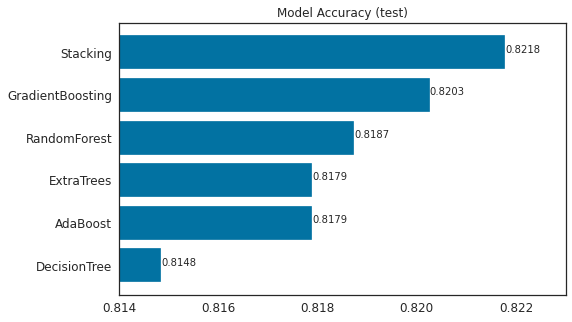

In [1592]:
models = ['DecisionTree', 'AdaBoost', 'ExtraTrees', 'RandomForest', 'GradientBoosting', 'Stacking']

acc = [acc_test_dtc, acc_test_abc, acc_test_etc, acc_test_rfc, acc_test_gbc, acc_test_stack]

plt.figure(figsize=(8,5))
plt.barh(models, acc)
  
for index, value in enumerate(acc):
    plt.text(value, index,
             str("%.4f"%value))
    
plt.xlim(0.814,0.823)
plt.title("Model Accuracy (test)");

In [1593]:
print(f"""
The five different algorithms used in this notebook are all in the tree-based family. They are non-parametric methods that make no assumptions of the 
training dataset or prediction of residuals (no distributional, independence, or constant variance assumptions)(1). As a result, they all share similarities 
and we would expect model performance to be in the same range. However, there is no model that is a priori guaranteed to work better. The only way to know 
for sure which model is best is to evaluate them all. 

First we used DecisionTreeClassifier. Since it makes no assumptions about the training data, if left unconstrained, the tree structure will adapt itself to 
the training data, fitting it very closely, and most likely overfitting it, which is a drawback of Decision Tree. This is what happened with the Baseline model
and the performance on the testing set is poor. By using RandomizedSearchCV, some hyperparameters were tuned down and the model generalized much better 
with an accuracy of {round(acc_test_dtc*100,1)}%. 

It is common knowledge in machine learning to build multiple decision trees and to merge them together in the hope to get a more accurate and stable 
prediction. This is called Ensemble Learning and can be divided into two main methods: Bagging and Boosting. Both methods predict (regression or 
classification) by combining the outputs from individual trees. They differ in the way the trees are built, ordered, and the way the results are combined. 
Knowing how each method works will help to understand why some are better than others.

Bagging (bootstrap aggregating) builds multiple decision trees by repeatedly re-sampling training data with replacement, and voting the trees for a consensus 
prediction. In order to promote model variance, bagging trains each model in the ensemble using a randomly drawn subset of the training set. In bagging the
samples are generated in such a way that the samples are different from each other however replacement is allowed. These samples are then given to multiple 
learners (trees) and then the results from each learner are combined in the form of voting. As an example, Random Forest is made from many trees hence the 
name Forest. It implements two concepts: random sampling and random subsets of features. Each tree is trained independently on subsets of the data using 
random samples and their predictions are averaged. This randomness helps to make the model more robust than a single decision tree, and less likely to overfit
on the training data. As a result, we can easily see how using a bagging ensemble learners (Random Forest or Extra Trees) would provide a better performance 
over a single Decision Tree. Our results show that Random Forest ({round(acc_test_rfc*100,1)}%) and Extra Trees ({round(acc_test_etc*100,1)}%) achieved almost 
the exact same accuracy and is better than Decision Tree alone.

Bagging main characteristics:
    - aim to decrease variance, not bias
    - each model receives equal weight
    - each model is built independently
    - different training data subsets are randomly drawn with replacement from the entire dataset
    - tries to solve overfitting problem

Boosting refers to a family of algorithms which converts weak learner to strong learners. Boosting build trees one at a time, where each new tree helps to 
correct errors made by previously trained tree. With each tree added, the model becomes even more expressive. Typical examples are AdaBoost and 
GradientBoosting. It is therefore to be expected to a certain extend that boosting algorithms would perform even better than bagging algorithms. Although not
significantly better, the best performer of the five algorithms is GradientBoosting with an accuracy of {round(acc_test_gbc*100,1)}%. On the other hand, 
AdaBoost did not outperform bagging algorithms but the default estimator (DecisionTree) was used so it’s not surprising that it achieved similar
performance as Decision Tree alone. However, boosting algorithms also comes with taking longer to train because of the fact that trees are built sequentially 
and are more prone to overfitting. Nevertheless, we can use strategies to overcome overfitting and build more generalized trees using a combination of 
hyperparameters like learning rate (shrinkage) and depth of tree. Generally the two parameters are kept on the lower side to allow for slow learning and 
better generalization.

Bagging main characteristics:
    - a way of combining predictions that belong to different types
    - aim to decrease bias, not variance
    - models are weighted according to their performance
    - new models are influenced by the performance of previously built models
    - every new subsets contains the elements that were misclassified by previous models

Stacking is yet another way of creating an ensemble of multiple models. Each estimator in the first layer predicts a different value and then the final 
estimator (also called a blender) takes these predictions as inputs and makes the final prediction. The basic idea is by using multiple learning algorithms 
we should obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone. Empirically, ensembles tend to
yield better results when there is a significant diversity among the models. Many ensemble methods, therefore, seek to promote diversity among the models 
they combine. One disadvantage of stacking is that it’s time consuming trying to tune each estimator but it gives better results. With our dataset, the 
winner of all algorithms/ensemble tried is indeed the stacking method of all tree-based algorithms with an accuracy of {round(acc_test_stack*100,1)}%. 

However, the number of component classifiers of an ensemble has a great impact on the accuracy of prediction and training time. Recently, a theoretical 
framework suggested that there is an ideal number of component classifiers for an ensemble such that having more or less than this number of classifiers 
would deteriorate the accuracy. It is called "the law of diminishing returns in ensemble construction." Their theoretical framework shows that using the 
same number of independent component classifiers as class labels gives the highest accuracy(2). The method of using only two estimators was tried on the 
side and it was found that using ExtraTree and GradientBoosting achieved the highest accuracy.

In summary, as expected, the better performer of all algorithms were using the boosting technique. In addition, stacking performed even better using the 
five algorithms or only two. However, I was surprised (and disappointed) to see how little improvement was gained from tuned-DTC to stacking (0.7%).

(1) https://en.wikipedia.org/wiki/Decision_tree_learning
(2) https://en.wikipedia.org/wiki/Ensemble_learning

""")


The five different algorithms used in this notebook are all in the tree-based family. They are non-parametric methods that make no assumptions of the 
training dataset or prediction of residuals (no distributional, independence, or constant variance assumptions)(1). As a result, they all share similarities 
and we would expect model performance to be in the same range. However, there is no model that is a priori guaranteed to work better. The only way to know 
for sure which model is best is to evaluate them all. 

First we used DecisionTreeClassifier. Since it makes no assumptions about the training data, if left unconstrained, the tree structure will adapt itself to 
the training data, fitting it very closely, and most likely overfitting it, which is a drawback of Decision Tree. This is what happened with the Baseline model
and the performance on the testing set is poor. By using RandomizedSearchCV, some hyperparameters were tuned down and the model generalized much better 
with an 